<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/Catalogo_Distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display, Markdown

# Configuración de estilo para las gráficas
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)

# Distribución Uniforme Continua

## Nomenclatura estándar
**Notación**: $ X \sim U(a, b) $

## Parámetros:
- $ a $: límite inferior ($ a \in \mathbb{R} $)
- $ b $: límite superior ($ b > a $, $ b \in \mathbb{R} $)
- Soporte: $ x \in [a, b] $

## Función de Densidad de Probabilidad (PDF)
La función de densidad para la distribución uniforme continua es:

$$
f(x) =
\begin{cases}
\frac{1}{b - a} & \text{para } a \leq x \leq b \\
0 & \text{para } x < a \text{ o } x > b
\end{cases}
$$

## Función de Distribución Acumulada (CDF)
La función de distribución acumulativa es:

$$
F(x) =
\begin{cases}
0 & \text{para } x < a \\
\frac{x - a}{b - a} & \text{para } a \leq x \leq b \\
1 & \text{para } x > b
\end{cases}
$$

## Medidas estadísticas
- **Media (valor esperado)**:
  $$ \mu = \frac{a + b}{2} $$
- **Varianza**:
  $$ \sigma^2 = \frac{(b - a)^2}{12} $$
- **Desviación estándar**:
  $$ \sigma = \frac{b - a}{2 \sqrt{3}} $$
- **Sesgo (skewness)**: $ 0 $ (la distribución es simétrica)

### Pseudocódigo

```
# FUNCIÓN simular_uniforme(a, b, n):
    // Genera n muestras de una distribución uniforme U(a,b)
    
    ENTRADA:
        a - límite inferior
        b - límite superior (b > a)
        n - número de muestras
    
    SALIDA:
        arreglo de n muestras aleatorias
    
    PASOS:
        1. Generar n números aleatorios entre 0 y 1: u ~ U(0,1)
        2. Escalar y desplazar: x = a + (b-a)*u
        3. Devolver x
```



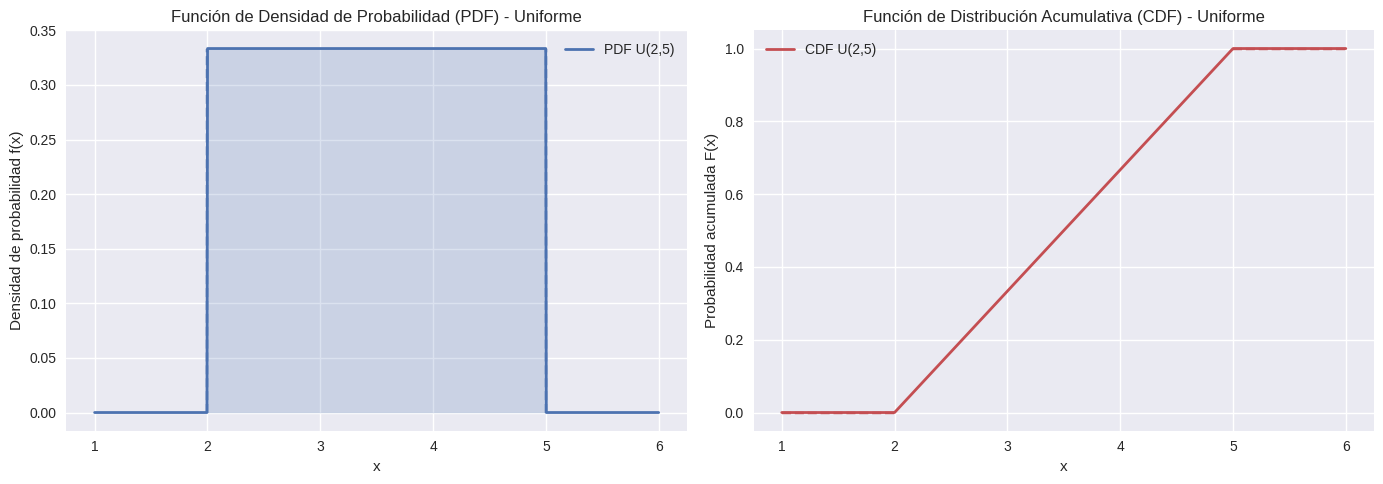

Para simular una **distribución uniforme continua** en un intervalo $[a,b]$, el método más directo y eficiente es la Transformada Inversa, ya que la función de distribución acumulativa (CDF) de la uniforme continua es fácil de invertir.

**¿Por qué la Transformada Inversa?**
- Simple y exacto: No requiere iteraciones ni evaluaciones complejas.

- Eficiente: Solo necesita una variable aleatoria uniforme estándar $U∼Unif(0,1) $ y una transformación lineal.

- No hay rechazo: A diferencia de otros métodos (como aceptación-rechazo), no hay desperdicio de números aleatorios.



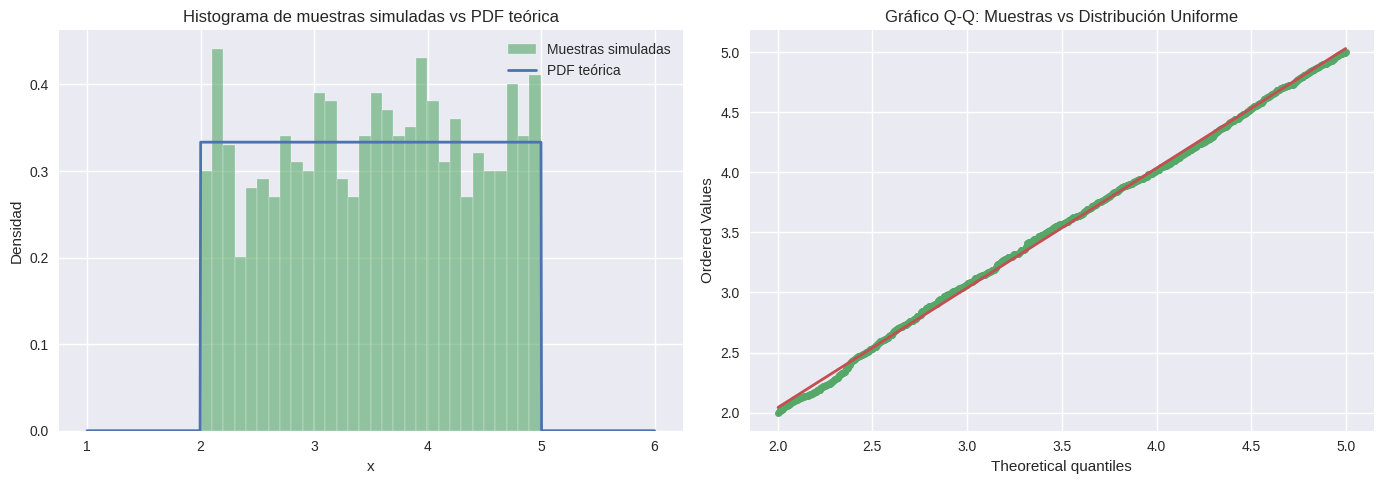

In [ ]:
def simular_uniforme(a, b, n=1000):
    """Simula n muestras de una distribución uniforme U(a,b)"""
    u = np.random.rand(n)
    return a + (b - a) * u

# Ejemplo de simulación
muestras = simular_uniforme(2, 5, 1000)

# Crear figura con dos subplots para visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de las muestras vs PDF teórica
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Histograma de muestras simuladas vs PDF teórica')
ax1.legend()
ax1.grid(True)

# Gráfica Q-Q para comparar distribuciones
stats.probplot(muestras, dist="uniform", sparams=(a, b-a), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Uniforme')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Distribución Triangular Continua

## Nomenclatura estándar
**Notación**:  
X ~ Tri(a, b, c)

**Parámetros**:
- `a`: límite inferior (a ∈ ℝ)
- `b`: límite superior (b > a, b ∈ ℝ)
- `c`: moda (a ≤ c ≤ b, c ∈ ℝ)

**Soporte**:  
x ∈ [a, b]

## Función de Densidad de Probabilidad (PDF)
La función de densidad para la distribución triangular es:

$$
f(x) = \begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & \text{para } a \leq x \leq c \\
\frac{2(b-x)}{(b-a)(b-c)} & \text{para } c \leq x \leq b \\
0 & \text{para } x < a \text{ o } x > b
\end{cases}
$$

## Función de Distribución Acumulada (CDF)
La función de distribución acumulativa es:

$$
F(x) = \begin{cases}
0 & \text{para } x < a \\
\frac{(x-a)^2}{(b-a)(c-a)} & \text{para } a \leq x \leq c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)} & \text{para } c \leq x \leq b \\
1 & \text{para } x > b
\end{cases}
$$

## Medidas estadísticas
**Media (valor esperado)**:  
$$\mu = \frac{a + b + c}{3}$$

**Varianza**:  
$$\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$$

**Moda**:  
$c$ (el valor donde se alcanza el pico)

**Sesgo (skewness)**:  
Depende de la posición de $c$ (asimétrica a menos que $c$ esté exactamente en el centro)



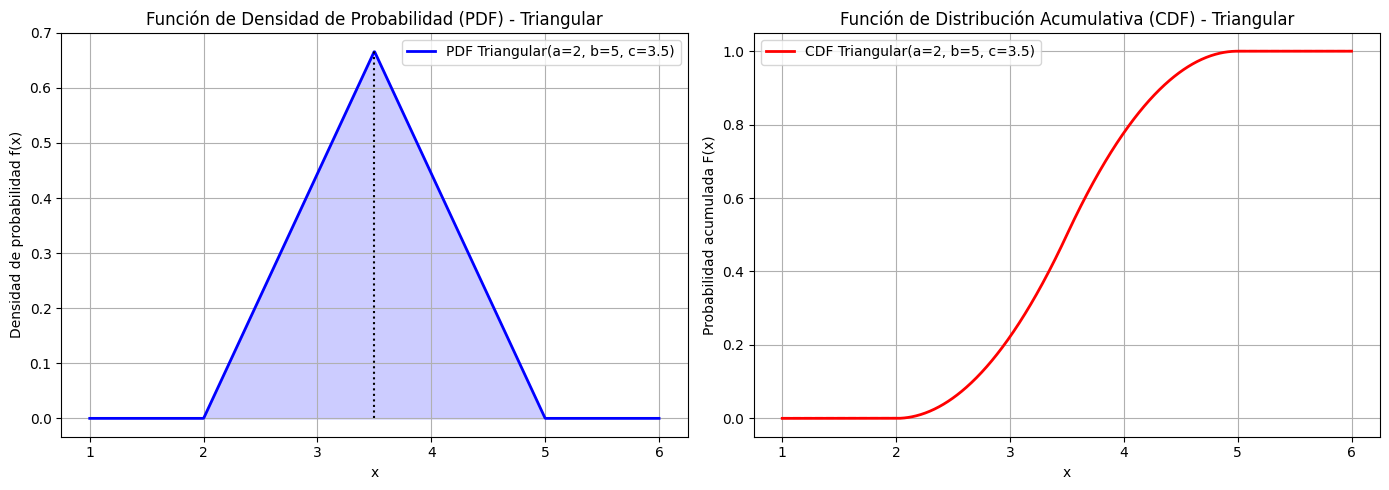

Para simular una distribución triangular continua definida en un intervalo  
$[a, b]$ con moda en $c$ (donde $a \leq c \leq b$), el método más eficiente y directo es la **Transformada Inversa**, debido a que su función de distribución acumulativa (CDF) es invertible analíticamente.  

 **¿Por qué la Transformada Inversa?**  
1. **Exactitud**: No introduce aproximaciones ni rechazos.  
2. **Eficiencia**: Solo requiere una variable aleatoria uniforme $U \sim \text{Unif}(0,1)$ y una transformación por partes.  
3. **Simplicidad**: La CDF de la triangular es lineal por partes, y su inversa se calcula fácilmente.  

**Nota**: Otros métodos como *Aceptación-Rechazo* o *Composición* son innecesarios aquí, ya que no mejoran la eficiencia y complican la implementación.  


```
# Pseudocódigo
Suponiendo una distribución triangular con parámetros a (mínimo), c (moda), y b (máximo):
1. Generar U ~ Uniforme(0, 1)
2. Calcular F_c = (c - a) / (b - a)  # CDF en la moda (c)
3. Si U <= F_c:
       X = a + sqrt(U * (b - a) * (c - a))
   Si U > F_c:
       X = b - sqrt((1 - U) * (b - a) * (b - c))
4. Devolver X
```



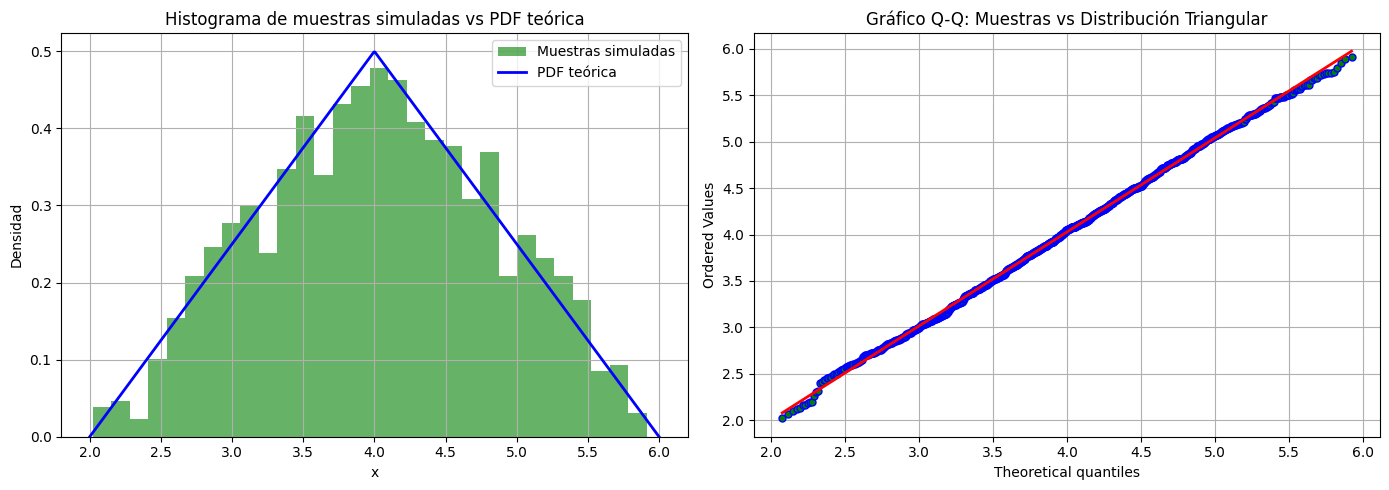

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_triangular(a, c, b, n=1000):
    """
    Simula n muestras de una distribución triangular continua T(a, c, b)
    usando el método de la transformada inversa.
    """
    u = np.random.rand(n)
    fc = (c - a) / (b - a)  # valor de la CDF en el punto c (moda)

    # Aplicación de la transformada inversa
    muestras = np.where(
        u < fc,
        a + np.sqrt(u * (b - a) * (c - a)),
        b - np.sqrt((1 - u) * (b - a) * (b - c))
    )

    return muestras

# Parámetros de la distribución triangular
a, c, b = 2, 4, 6
n = 1000
muestras = simular_triangular(a, c, b, n)

# Valores para la PDF teórica
x = np.linspace(a, b, 500)
pdf = stats.triang.pdf(x, (c - a) / (b - a), loc=a, scale=(b - a))

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF teórica
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Histograma de muestras simuladas vs PDF teórica')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q con la distribución triangular
stats.probplot(muestras, dist="triang", sparams=((c - a)/(b - a), a, b - a), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Triangular')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Exponencial

## Nomenclatura estándar
**Notación**:  
$ X \sim \text{Exp}(\lambda) $

## Parámetros:
- $\lambda$: tasa ($\lambda > 0$)
- **Soporte**: $x \in [0, \infty)$

## Función de Densidad de Probabilidad (PDF)
$$
f(x) = \lambda e^{-\lambda x}
$$

## Función de Distribución Acumulada (CDF)
$$
F(x) = 1 - e^{-\lambda x}
$$

## Medidas estadísticas
- **Media**: $\mu = \frac{1}{\lambda}$
- **Varianza**: $\sigma^2 = \frac{1}{\lambda^2}$
- **Moda**: $0$
- **Sesgo**: $2$

## Pseudocódigo para simulación


```
# FUNCIÓN simular_exponencial(λ, n):
    ENTRADA:
        λ: parámetro de tasa
        n: tamaño de muestra
    SALIDA:
        muestra de n valores exponenciales
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        u = random()  # Uniforme(0,1)
        x = -ln(1 - u)/λ
        muestra.agregar(x)
    RETORNAR muestra
```




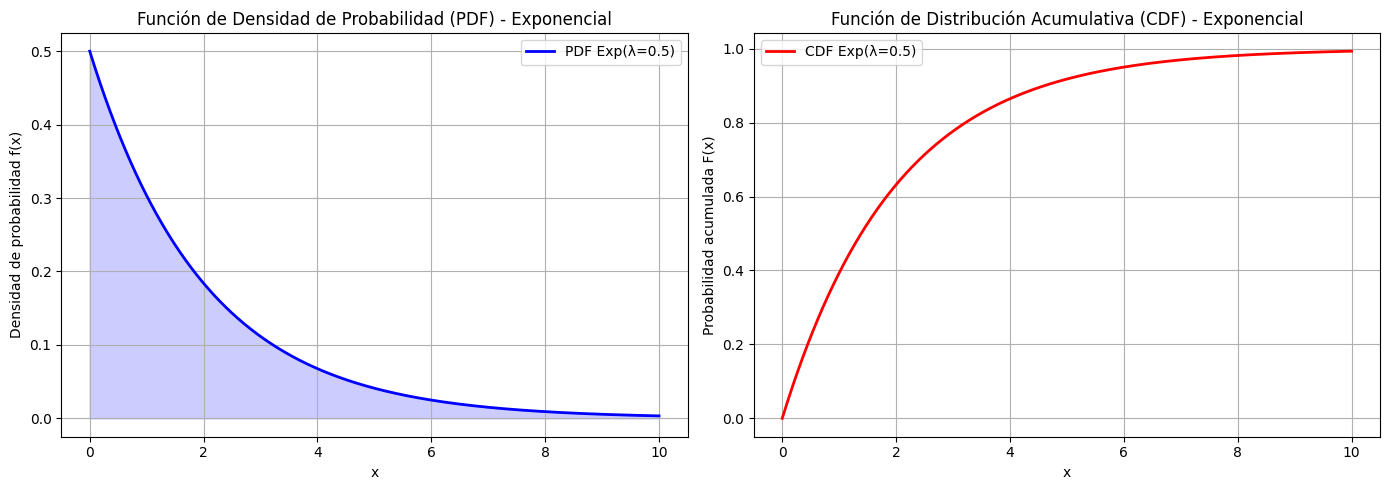

Para simular una distribución exponencial con parámetro de tasa  
$\lambda > 0$, el método más eficiente y utilizado es la **Transformada Inversa**, debido a su simplicidad y bajo costo computacional.  
**¿Por qué la Transformada Inversa?**  
1. **Exactitud**: Genera muestras exactas sin aproximaciones.  
2. **Eficiencia**: Solo requiere generar una variable uniforme $U \sim \text{Unif}(0,1)$ y aplicar una operación matemática simple.  
3. **Fundamento teórico**: La CDF de la exponencial es invertible analíticamente.  

**Nota**: Otros métodos como *Aceptación-Rechazo* o *Box-Muller* son innecesarios aquí, ya que no mejoran la eficiencia y complican la implementación.  





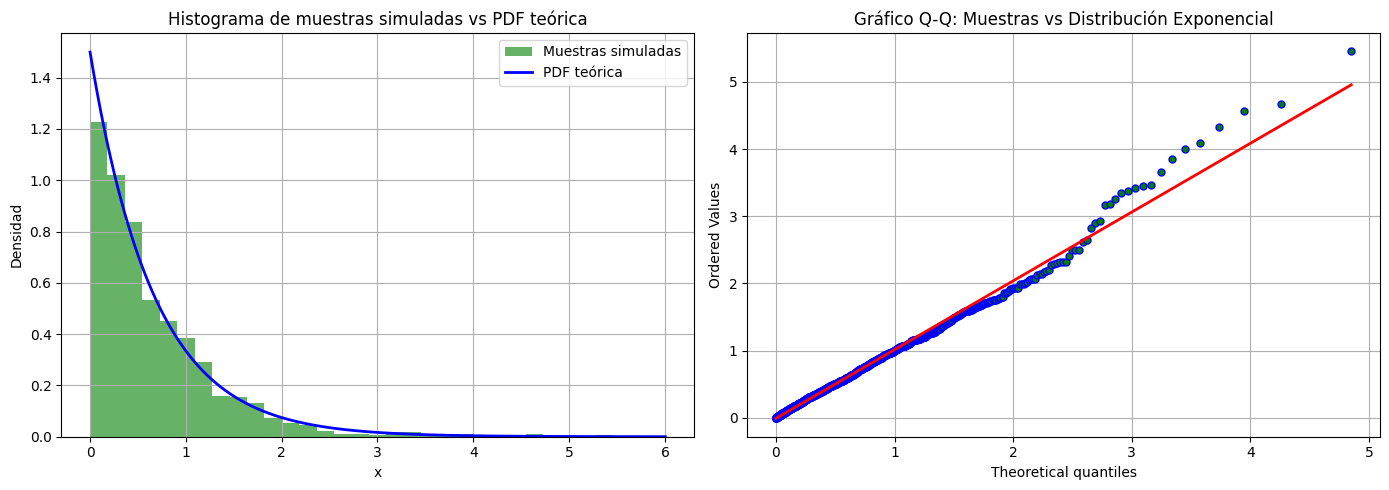

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_exponencial(lambd, n=1000):
    """
    Simula n muestras de una distribución exponencial con parámetro lambda > 0
    usando el método de la transformada inversa.
    """
    u = np.random.rand(n)
    return -np.log(u) / lambd

# Parámetro de la exponencial (lambda)
lambd = 1.5
n = 1000
muestras = simular_exponencial(lambd, n)

# PDF teórica
x = np.linspace(0, np.max(muestras) * 1.1, 500)
pdf = stats.expon.pdf(x, scale=1/lambd)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF teórica
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Histograma de muestras simuladas vs PDF teórica')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q con la distribución exponencial
stats.probplot(muestras, dist="expon", sparams=(0, 1/lambd), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Exponencial')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución m-Erlang

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Erlang}(m, \lambda)$

## Parámetros
- $m$: parámetro de forma ($m \in \mathbb{N}$)
- $\lambda$: tasa ($\lambda > 0$)
- **Soporte**: $x \in [0, \infty)$

## Función de Densidad de Probabilidad (PDF)
$$f(x) = \frac{\lambda^m x^{m-1} e^{-\lambda x}}{(m-1)!}$$

## Función de Distribución Acumulada (CDF)
$$ 1 - e^{-\lambda x} \sum_{k=0}^{m-1} \frac{(\lambda x)^k}{k!}$$


## Medidas estadísticas
- **Media**: $\mu = \frac{m}{\lambda}$
- **Varianza**: $\sigma^2 = \frac{m}{\lambda^2}$
- **Moda**: $\frac{m-1}{\lambda}$ para $m \geq 1$
- **Sesgo**: $\frac{2}{\sqrt{m}}$

## Pseudocódigo para simulación
```
FUNCIÓN simular_erlang(m, λ, n):
    ENTRADA:
        m: parámetro de forma
        λ: parámetro de tasa
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Erlang
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        suma = 0
        PARA j DESDE 1 HASTA m:
            u = random() # Uniforme(0,1)
            suma += -ln(1 - u)
        x = suma/λ
        muestra.agregar(x)
    RETORNAR muestra
```

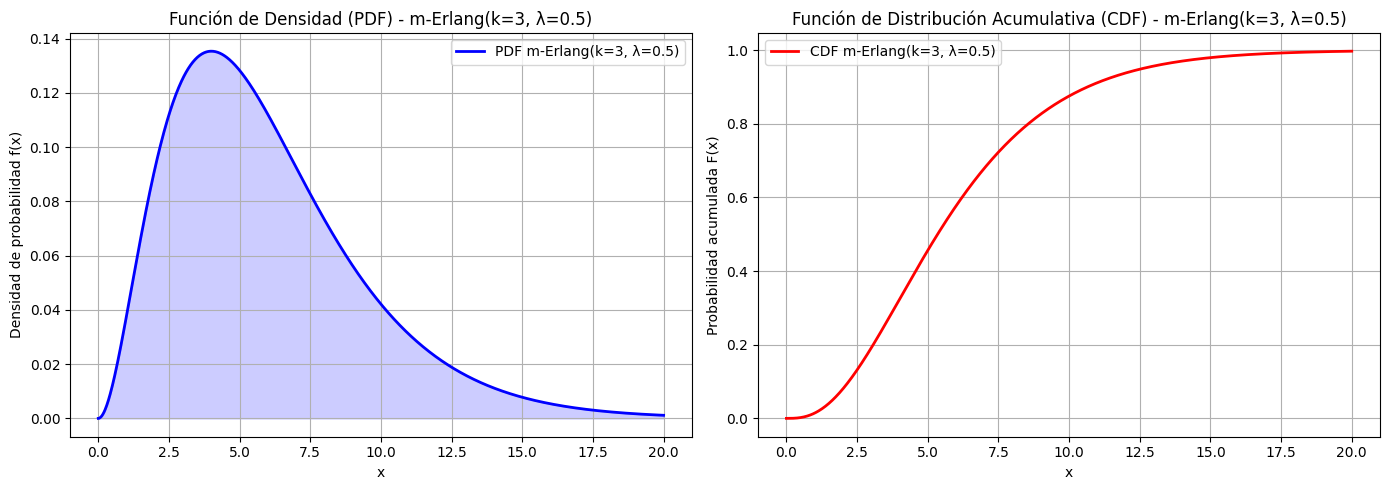

Para simular una distribución m-Erlang (donde  
$m$ es un entero positivo y $\lambda > 0$ es la tasa), el método más eficiente y utilizado es el **Método de Composición**, aprovechando que una variable m-Erlang es la suma de $m$ variables exponenciales independientes con parámetro $\lambda$.  

**¿Por qué el Método de Composición?**
1. **Relación directa con la exponencial**:  
   Una variable $X \sim \text{Erlang}(m,\lambda)$ puede expresarse como:  
   $$X = \sum_{i=1}^m Y_i, \text{ donde } Y_i \sim \text{Exponencial}(\lambda).$$  
   Esto permite reutilizar el método de la transformada inversa para generar cada $Y_i$.  

2. **Exactitud y simplicidad**:  
   - No requiere aproximaciones ni algoritmos complejos como aceptación-rechazo.  
   - Es computacionalmente eficiente para $m$ moderados.  

3. **Ventaja sobre otros métodos**:  
   - *Transformada inversa*: La CDF de la Erlang no tiene una inversa cerrada simple para $m>1$.  
   - *Aceptación-Rechazo*: Innecesario aquí, ya que la composición es exacta.  
   - *Box-Muller/Método de las 12 uniformes*: Solo aplicables a normales.  



```
# Pseudocódigo

1. Generar m variables exponenciales Y_i ~ Exponencial(λ) usando:
   Y_i = -ln(U_i) / λ, donde U_i ~ Uniforme(0, 1).
2. Sumar las Y_i para obtener X = Y_1 + Y_2 + ... + Y_m.
3. Devolver X.

```



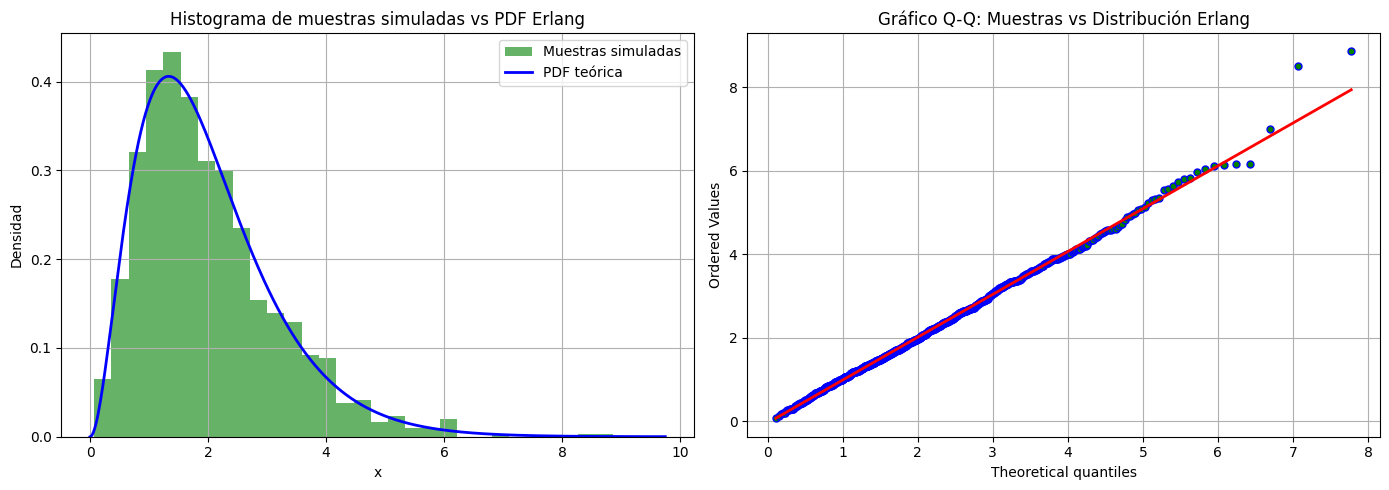

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_erlang(m, lambd, n=1000):
    """
    Simula n muestras de una distribución Erlang(m, lambda) usando el método de composición.
    Suma m variables exponenciales con parámetro lambda.
    """
    u = np.random.rand(n, m)
    y = -np.log(u) / lambd
    return np.sum(y, axis=1)

# Parámetros de la Erlang
m = 3        # número de fases (entero)
lambd = 1.5  # tasa
n = 1000
muestras = simular_erlang(m, lambd, n)

# PDF teórica (Erlang = Gamma con k entero)
x = np.linspace(0, np.max(muestras) * 1.1, 500)
pdf = stats.gamma.pdf(x, a=m, scale=1/lambd)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF teórica
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Histograma de muestras simuladas vs PDF Erlang')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q con la distribución Gamma/Erlang
stats.probplot(muestras, dist="gamma", sparams=(m, 0, 1/lambd), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Erlang')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Gamma

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Gamma}(\alpha, \beta)$

## Parámetros
- $\alpha$: parámetro de forma ($\alpha > 0$)
- $\beta$: parámetro de escala ($\beta > 0$)
- **Soporte**: $x \in (0, \infty)$

## Función de Densidad de Probabilidad (PDF)
$$f(x) = \frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$$

## Función de Distribución Acumulada (CDF)
$$f(x) =\frac{\gamma(\alpha, x/\beta)}{\Gamma(\alpha)} $$

## Medidas estadísticas
- **Media**: $\mu = \alpha\beta$
- **Varianza**: $\sigma^2 = \alpha\beta^2$
- **Moda**: $\frac{m-1}{\lambda}$ (para $m \geq 1$)
- **Sesgo**: $\frac{2}{\sqrt{m}}$

## Pseudocódigo para simulación (Método de Ahrens-Dieter cuando α > 1)
```
FUNCIÓN simular_gamma(α, β, n):
    ENTRADA:
        α: parámetro de forma
        β: parámetro de escala
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Gamma
    
    SI α == 1: RETORNAR simular_exponencial(β, n)
    
    muestra = []
    d = α - 1/3
    c = 1/sqrt(9*d)
    
    PARA i DESDE 1 HASTA n:
        REPETIR:
            z = random_normal(0,1)
            SI z > -1/c:
                v = (1 + c*z)^3
                u = random()
                SI ln(u) < 0.5*z^2 + d - d*v + d*ln(v):
                    x = d*v/β
                    muestra.agregar(x)
                    TERMINAR REPETIR
    RETORNAR muestra
```

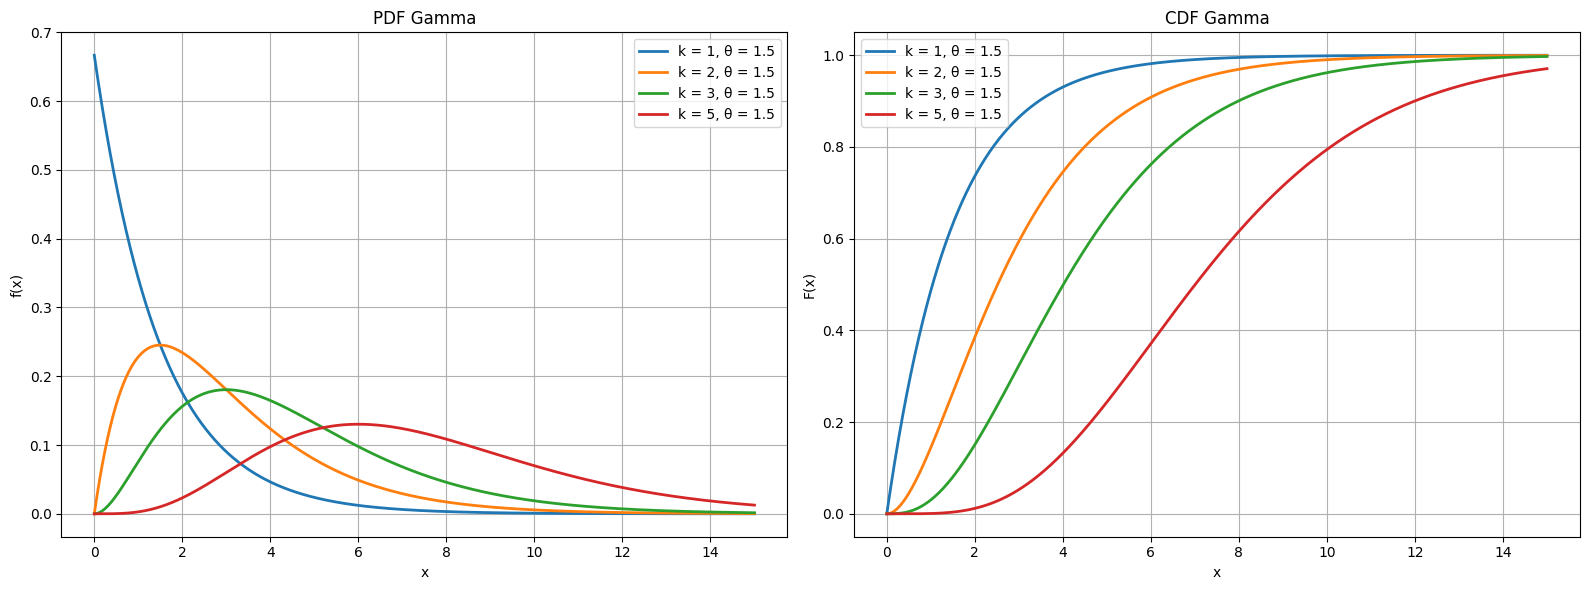

Para simular una distribución Gamma con parámetros de forma  
$\alpha > 0$ y tasa $\lambda > 0$, el método recomendado depende del valor de $\alpha$:

**Elección del Método**

**Si $\alpha$ es entero (Gamma = Erlang):**  
- **Método de Composición**: Sumar $\alpha$ variables exponenciales i.i.d. con tasa $\lambda$.  
- *Ventaja*: Exacto y eficiente.

**Si $\alpha < 1$:**  
- **Algoritmo de Aceptación-Rechazo** (ej. método de Ahrens-Dieter o Marsaglia-Tsang).  
- *Ventaja*: Maneja correctamente la cola pesada cuando $\alpha$ es pequeño.

**Si $\alpha > 1$:**  
- **Método de Aceptación-Rechazo** (ej. algoritmo de Marsaglia-Tsang).  
- *Ventaja*: Más eficiente que la transformada inversa (que no es analíticamente manejable).

**Si $\alpha = 1$ (Gamma = Exponencial):**  
- **Transformada Inversa**: $X = -\ln(U)/\lambda$.



```
# Pseudocódigo (Marsaglia-Tsang para α≥1):
plaintext
1. Calcular d = α - 1/3 y c = 1 / sqrt(9*d)
2. Repetir:
     a. Generar Z ~ N(0, 1)
     b. Si Z > -1/c:
         Calcular v = (1 + c*Z)^3
         Generar U ~ Uniforme(0, 1)
         Si ln(U) < 0.5*Z² + d - d*v + d*ln(v):
             Aceptar X = d*v / λ
3. Devolver X

# Pseudocódigo (Ahrens-Dieter para α<1):
plaintext
1. Generar U1, U2 ~ Uniforme(0, 1)
2. Calcular t = 1 + 0.3678794*α (0.3678794 ≈ 1/e)
3. Si U1 <= 1/t:
     X = (t*U1)^(1/α)
   Sino:
     X = -ln(t*(1 - U1)/α)
4. Si U2 <= e^(-X): Aceptar X / λ
```



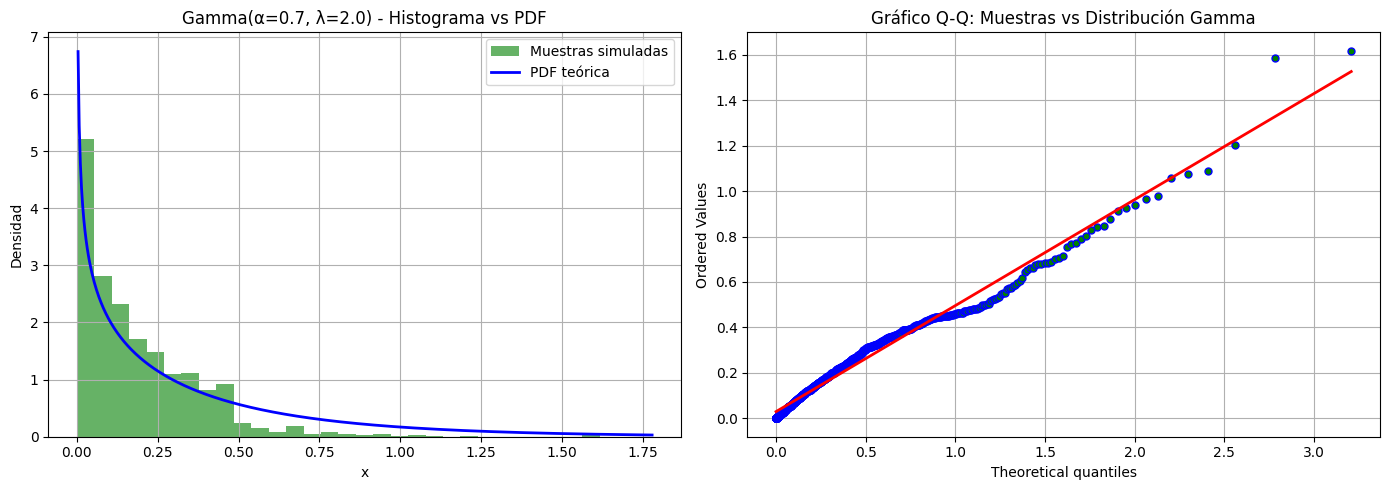

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_gamma(alpha, lambd, n=1000):
    """
    Simula n muestras de una distribución Gamma(α, λ) usando:
    - Método de Marsaglia-Tsang para α ≥ 1
    - Método de Ahrens-Dieter para α < 1
    """
    muestras = []
    while len(muestras) < n:
        if alpha >= 1:
            # Marsaglia-Tsang
            d = alpha - 1/3
            c = 1 / np.sqrt(9 * d)
            while True:
                Z = np.random.randn()
                if Z > -1 / c:
                    v = (1 + c * Z) ** 3
                    U = np.random.rand()
                    if np.log(U) < 0.5 * Z**2 + d * (1 - v + np.log(v)):
                        muestras.append(d * v / lambd)
                        break
        else:
            # Ahrens-Dieter
            while True:
                U1, U2 = np.random.rand(2)
                t = 1 + 0.3678794 * alpha  # approx 1/e
                if U1 <= 1 / t:
                    X = (t * U1) ** (1 / alpha)
                else:
                    X = -np.log(t * (1 - U1) / alpha)
                if U2 <= np.exp(-X):
                    muestras.append(X / lambd)
                    break
    return np.array(muestras)

# Parámetros
alpha = 0.7   # cambia este valor para probar con α < 1 y α ≥ 1
lambd = 2.0
n = 1000

# Simulación
muestras = simular_gamma(alpha, lambd, n)

# PDF teórica
x = np.linspace(0, np.max(muestras)*1.1, 500)
pdf = stats.gamma.pdf(x, a=alpha, scale=1/lambd)

# Gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title(f'Gamma(α={alpha}, λ={lambd}) - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Q-Q plot
stats.probplot(muestras, dist="gamma", sparams=(alpha, 0, 1/lambd), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Gamma')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Weibull

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Weibull}(\lambda, k)$

## Parámetros
- $\lambda$: parámetro de escala ($\lambda > 0$)
- $k$: parámetro de forma ($k > 0$)
- **Soporte**: $x \in [0, \infty)$

## Función de Densidad de Probabilidad (PDF)
$$f(x) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}$$

## Función de Distribución Acumulativa (CDF)
$$f(x) =  1 - e^{-(x/\lambda)^k}$$

## Medidas estadísticas
- **Media**: $\mu = \lambda\,\Gamma(1 + \frac{1}{k})$
- **Varianza**: $\sigma^2 = \lambda^2\left[\Gamma(1 + \frac{2}{k}) - \left(\Gamma(1 + \frac{1}{k})\right)^2\right]$
- **Moda**: $\lambda\left(\frac{k-1}{k}\right)^{1/k}$ (para $k > 1$)
- **Sesgo**: $\frac{\Gamma(1+\frac{3}{k})\lambda^3 - 3\mu\sigma^2 - \mu^3}{\sigma^3}$

## Pseudocódigo para simulación
```
FUNCIÓN simular_weibull(λ, k, n):
    ENTRADA:
        λ: parámetro de escala
        k: parámetro de forma
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Weibull
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        u = random() # Uniforme(0,1)
        x = λ * (-ln(1 - u))^(1/k)
        muestra.agregar(x)
    RETORNAR muestra
```

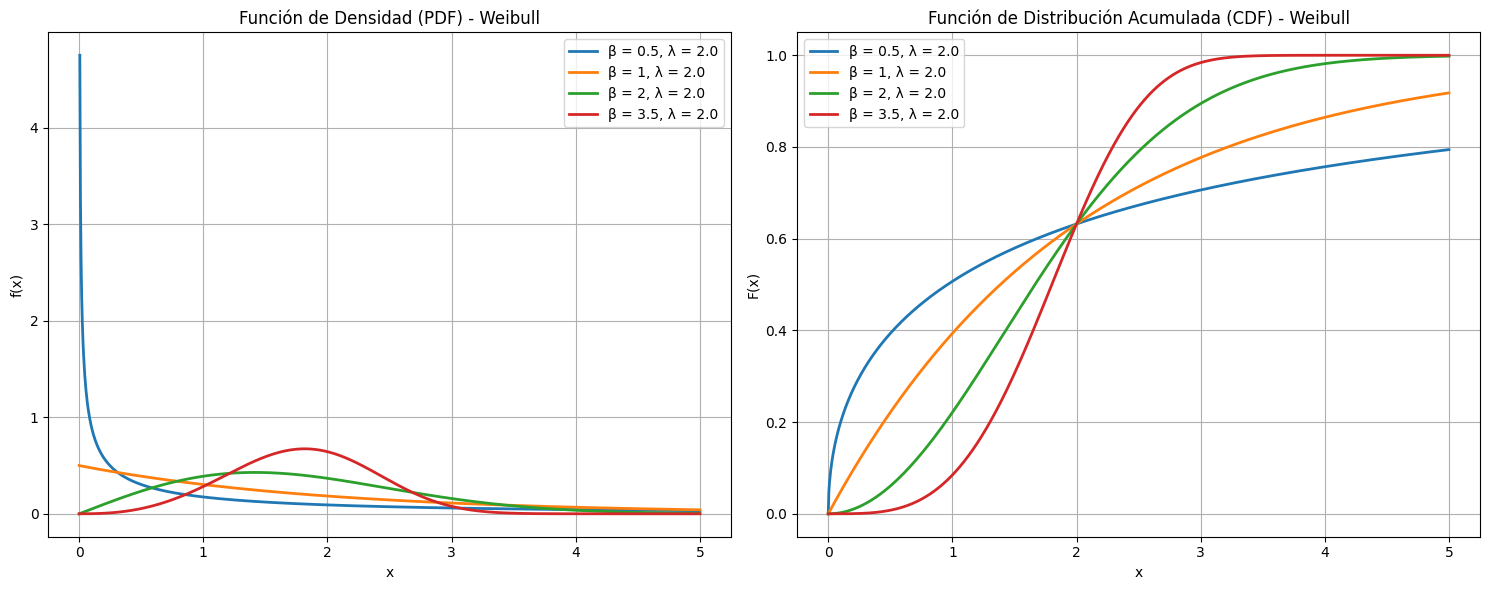

**¿Por qué la Transformada Inversa?**

**Exactitud**: Genera muestras exactas sin aproximaciones.

**Eficiencia**: Solo requiere generar una variable uniforme  
$U \sim \text{Unif}(0,1)$ y aplicar una fórmula cerrada.

**Simplicidad**: La CDF de la Weibull es invertible analíticamente:  
$$
F(x) = 1 - e^{-(x/\lambda)^k} \implies F^{-1}(u) = \lambda \cdot (-\ln(1-u))^{1/k}.
$$  
Como $U$ y $1-U$ son igualmente distribuidas, se simplifica a:  
$$
X = \lambda \cdot (-\ln U)^{1/k}.
$$

Ventaja sobre otros métodos:

- **Aceptación-Rechazo**: Innecesario (la transformada inversa ya es óptima).
- **Box-Muller/Método de las 12 uniformes**: Para normales, no aplica aquí.
- **Composición**: No hay beneficio, ya que la Weibull no es una mezcla de otras distribuciones simples.

```
# Pseudocódigo

1. Generar U ~ Uniforme(0, 1).
2. Calcular X = λ * (-ln(U))^(1/k).
3. Devolver X.

```



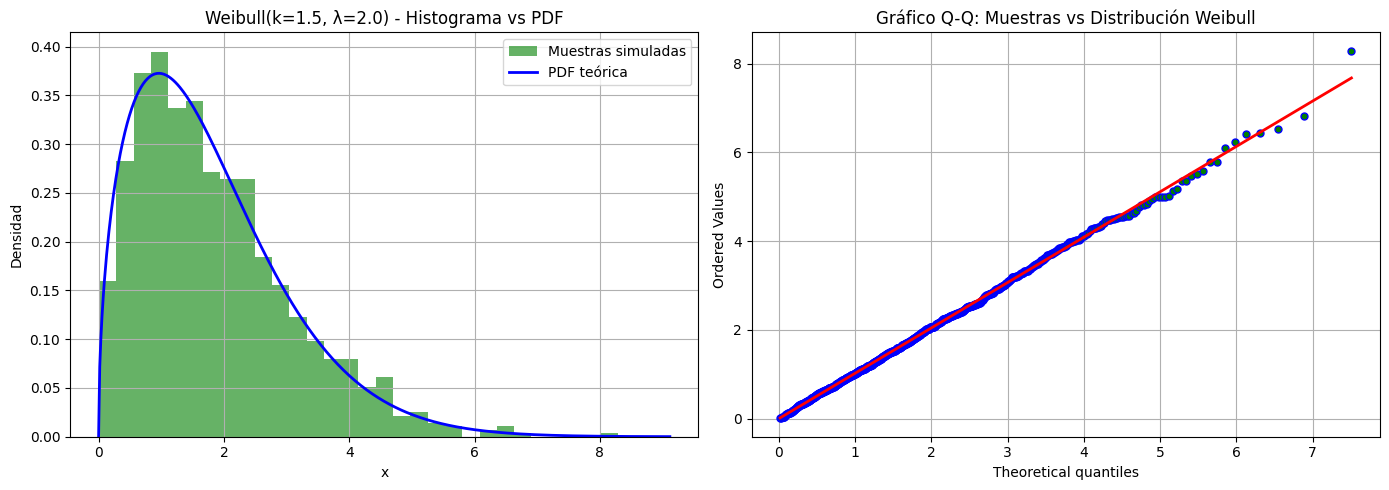

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_weibull(k, lambd, n=1000):
    """
    Simula n muestras de una distribución Weibull(k, lambda) usando el método de la transformada inversa.
    """
    u = np.random.rand(n)
    return lambd * (-np.log(1 - u))**(1 / k)
# Parámetros
k = 1.5        # parámetro de forma
lambd = 2.0    # parámetro de escala
n = 1000

# Simulación
muestras = simular_weibull(k, lambd, n)

# PDF teórica
x = np.linspace(0, np.max(muestras)*1.1, 500)
pdf = stats.weibull_min.pdf(x, c=k, scale=lambd)

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title(f'Weibull(k={k}, λ={lambd}) - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q
stats.probplot(muestras, dist="weibull_min", sparams=(k, 0, lambd), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Weibull')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Normal

## Nomenclatura estándar
**Notación**:  
$X \sim N(\mu, \sigma^2)$

## Parámetros
- $\mu$: media ($\mu \in \mathbb{R}$)
- $\sigma$: desviación estándar ($\sigma > 0$)
- **Soporte**: $x \in \mathbb{R}$

## Función de Densidad de Probabilidad (PDF)
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

## Función de Distribución Acumulativa (CDF)
$$ F(x) = \Phi\left(\frac{x-\mu}{\sigma}\right) $$

* Donde $\Phi $ es la FDA de la normal estándar $N(0,1)$.

## Medidas estadísticas
- **Media**: $\mu$
- **Varianza**: $\sigma^2$
- **Moda**: $\mu$
- **Sesgo**: $0$

## Pseudocódigo para simulación (Método Box-Muller)
```
FUNCIÓN simular_normal(μ, σ, n):
    ENTRADA:
        μ: media
        σ: desviación estándar
        n: tamaño de muestra
    SALIDA:
        muestra de n valores normales
    
    muestra = []
    PARA i DESDE 1 HASTA n/2:
        u1 = random()  # Uniforme(0,1)
        u2 = random()  # Uniforme(0,1)
        z1 = sqrt(-2*ln(u1)) * cos(2*π*u2)
        z2 = sqrt(-2*ln(u1)) * sin(2*π*u2)
        muestra.agregar(μ + σ*z1)
        muestra.agregar(μ + σ*z2)
    
    SI n es impar:
        u = random()  # Uniforme(0,1)
        z = sqrt(-2*ln(u)) * cos(2*π*random())
        muestra.agregar(μ + σ*z)
    
    RETORNAR muestra
```

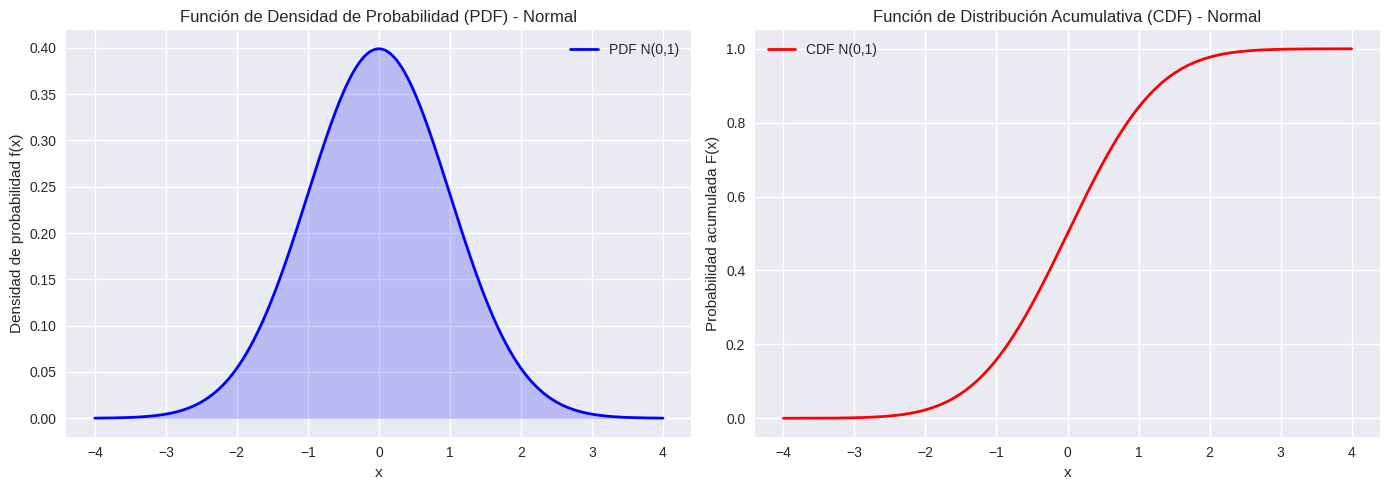


Para simular una distribución normal estándar (o general, con media $\mu$ y desviación $\sigma$), el método más eficiente y ampliamente utilizado es el **Método de Box-Muller**, debido a su equilibrio entre precisión, eficiencia computacional y facilidad de implementación.

**¿Por qué Box-Muller?**

1. **Exactitud**:  
   Genera muestras normales exactas a partir de transformaciones matemáticas precisas.

2. **Eficiencia**:  
   Solo requiere dos variables uniformes $U_1, U_2 \sim \text{Unif}(0,1)$ y evita rechazos.

3. **Popularidad**:  
   Es el estándar en librerías como NumPy y SciPy.

**Alternativas según contexto**:
- *Transformada Inversa*: Para necesidades de precisión extrema (mayor costo computacional)
- *Marsaglia Polar*: Versión optimizada de Box-Muller (rechaza ~27% de muestras)
- *Ziggurat*: Óptimo para implementaciones de bajo nivel (mayor complejidad algorítmica)

**Nota**: Para convertir a normal general:  
$X = \mu + \sigma Z$ donde $Z \sim N(0,1)$
```
# Pseudocódigo

1. Generar U1, U2 ~ Uniforme(0, 1) independientes.
2. Calcular:
   Z1 = sqrt(-2 * ln(U1)) * cos(2π * U2)
   Z2 = sqrt(-2 * ln(U1)) * sin(2π * U2)
3. Devolver Z1 y Z2 (o escalar a N(μ, σ²): X = μ + σ * Z1).
```



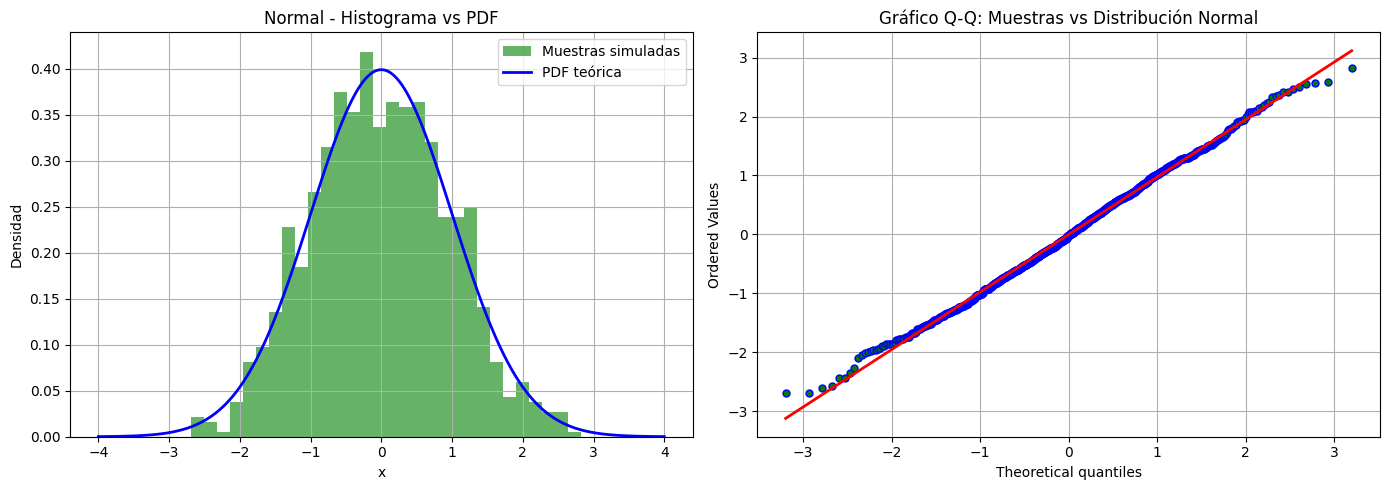

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_normal_box_muller(mu=0, sigma=1, n=1000):
    """
    Simula n muestras de una distribución Normal(mu, sigma^2) usando el método de Box-Muller.
    """
    u1 = np.random.rand(n // 2)
    u2 = np.random.rand(n // 2)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi* u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi* u2)

    z = np.concatenate([z1, z2])
    return mu + sigma * z[:n]  # Si n es impar, se recorta una muestra
# Parámetros
mu = 0
sigma = 1
n = 1000

# Simulación
muestras = simular_normal_box_muller(mu, sigma, n)

# PDF teórica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Normal - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q
stats.probplot(muestras, dist="norm", sparams=(mu, sigma), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Normal')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Log-normal

## Nomenclatura estándar
**Notación**:  
$X \sim \text{LN}(\mu, \sigma^2)$

## Parámetros
- $\mu$: media del logaritmo ($\mu \in \mathbb{R}$)
- $\sigma$: desviación estándar del logaritmo ($\sigma > 0$)
- **Soporte**: $x > 0$

## Función de Densidad de Probabilidad (PDF)
 $$ f(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}} \quad \text{para } x > 0 $$


## Función de Distribución Acumulativa (CDF)
$$ F(x) = \Phi\left(\frac{\ln x - \mu}{\sigma}\right) $$

Donde $\Phi$ es la FDA de la normal estándar.

## Relación con la Normal
Si $Y \sim N(\mu, \sigma^2)$, entonces $X = e^Y \sim \text{LN}(\mu, \sigma^2)$

## Medidas estadísticas)
- **Media**: $\mu = e^{\mu + \frac{\sigma^2}{2}}$
- **Varianza**: $\sigma^2 = (e^{\sigma^2} - 1)e^{2\mu + \sigma^2}$
- **Moda**: $e^{\mu - \sigma^2}$
- **Sesgo**: $(e^{\sigma^2} + 2)\sqrt{e^{\sigma^2} - 1}$

## Pseudocódigo para simulación
```
FUNCIÓN simular_lognormal(μ, σ, n):
    ENTRADA:
        μ: media del logaritmo
        σ: desviación estándar del logaritmo
        n: tamaño de muestra
    SALIDA:
        muestra de n valores log-normales
    
    muestra_normal = simular_normal(μ, σ, n)
    RETORNAR [exp(x) for x in muestra_normal]
```

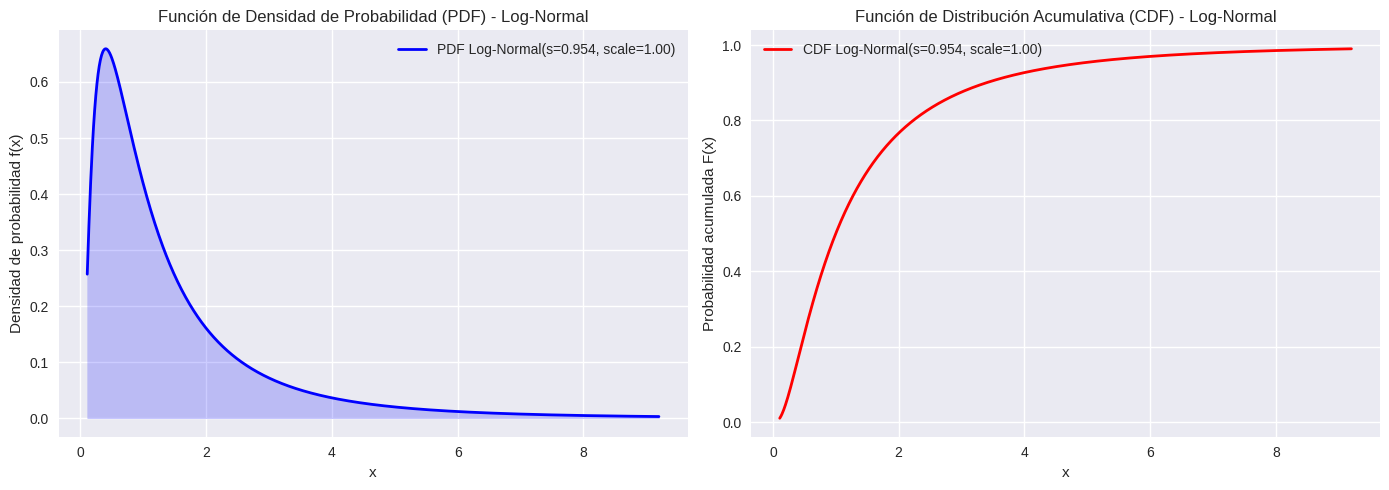

Para simular una distribución log-normal (donde $\ln(X) \sim N(\mu, \sigma^2)$), el método más eficiente y directo es la **transformación de una normal generada previamente**, aprovechando su relación directa con la distribución normal.
**¿Por qué usar la transformación de una normal?**

1. **Relación matemática exacta**  
   Si $Z \sim N(\mu, \sigma^2)$, entonces $X = e^Z$ sigue una log-normal.  
   Esto evita métodos complejos como aceptación-rechazo o composición.

2. **Eficiencia**  
   - Se basa en generar primero una normal (ej. con Box-Muller o Marsaglia)  
   - Luego aplicar la exponencial  
   - Es más rápido que métodos como la transformada inversa (que requeriría invertir la CDF log-normal, no analítica)

3. **Precisión**  
   No introduce errores de aproximación (la exponencial es exacta).

**Ventaja sobre otros métodos:**

- **Aceptación-Rechazo**: Innecesario (la transformación es directa)  
- **Método de las 12 uniformes**: Obsoleto e impreciso  
- **Composición**: No aplicable (no es una mezcla de distribuciones)

```
# Pseudocodigo

1. Generar Z ~ N(μ, σ²) usando Box-Muller:
   - U1, U2 ~ Unif(0, 1)
   - Z1 = sqrt(-2 * ln(U1)) * cos(2π * U2)
   - Z2 = sqrt(-2 * ln(U1)) * sin(2π * U2)
   (Escalar: Z = μ + σ * Z1)
2. Calcular X = exp(Z)
3. Devolver X

```



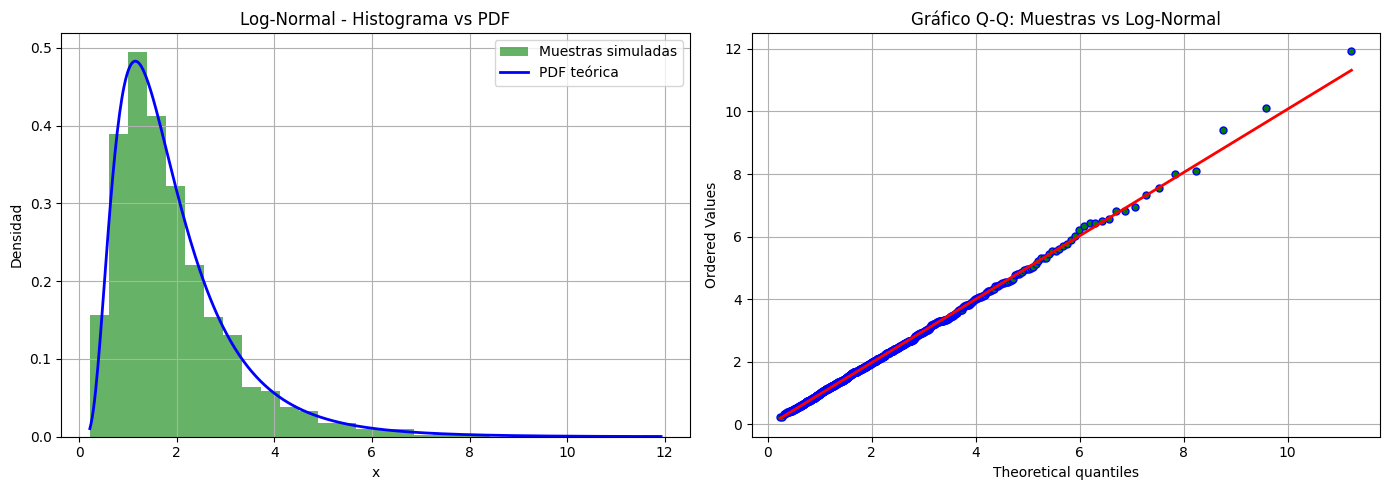

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_log_normal(mu=0, sigma=1, n=1000):
    """
    Simula n muestras de una distribución Log-Normal usando Box-Muller.
    """
    u1 = np.random.rand(n // 2)
    u2 = np.random.rand(n // 2)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    z = np.concatenate([z1, z2])[:n]
    normal = mu + sigma * z
    return np.exp(normal)

# Parámetros
mu = 0.5
sigma = 0.6
n = 1000

# Simular muestras
muestras = simular_log_normal(mu, sigma, n)

# Rango para la PDF
x = np.linspace(min(muestras), max(muestras), 500)
pdf = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Log-Normal - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q
stats.probplot(muestras, dist="lognorm", sparams=(sigma, 0, np.exp(mu)), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Log-Normal')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Beta

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Beta}(\alpha, \beta)$

## Parámetros
- $\alpha$: parámetro de forma ($\alpha > 0$)
- $\beta$: parámetro de forma ($\beta > 0$)
- **Soporte**: $x \in [0, 1]$

## Función de Densidad de Probabilidad (PDF)

 $$  \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} \quad  \text{para }  0 \leq x \leq 1$$

Donde $ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)} $ es la función beta

## Función de Distribución Acumulativa (CDF)
$$ F(x) = I_x(\alpha, \beta) $$

Donde $ I_x $ es la función beta incompleta regularizada

## Medidas estadísticas (Distribución Beta)

- **Media**: $\mu = \frac{\alpha}{\alpha + \beta}$
- **Varianza**: $\sigma^2 = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$
- **Moda**: $\frac{\alpha-1}{\alpha+\beta-2}$ (para $\alpha > 1$ y $\beta > 1$)

- **Sesgo**: $\frac{2(\beta-\alpha)\sqrt{\alpha+\beta+1}}{(\alpha+\beta+2)\sqrt{\alpha\beta}}$

## Pseudocódigo para simulación (Método de Johnk cuando α, β < 1)
```
FUNCIÓN simular_beta(α, β, n):
    ENTRADA:
        α, β: parámetros de forma
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Beta
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        REPETIR:
            u = random()  # Uniforme(0,1)
            v = random()  # Uniforme(0,1)
            w = u^(1/α)
            z = v^(1/β)
            SI w + z <= 1:
                x = w/(w + z)
                muestra.agregar(x)
                TERMINAR REPETIR
    RETORNAR muestra
```

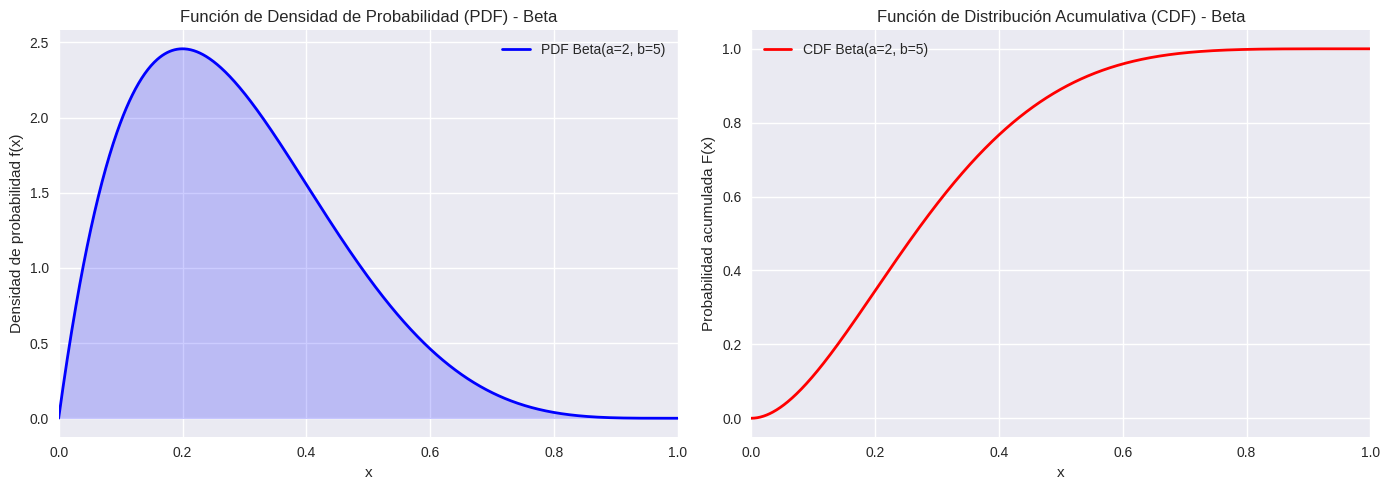

Para simular una distribución Beta con parámetros de forma $\alpha > 0$ y $\beta > 0$, el método recomendado depende de los valores de $\alpha$ y $\beta$:

**Elección del Método**

**Si $\alpha$ y $\beta$ son iguales a 1**:
- Beta se reduce a una uniforme: Usar `np.random.uniform(0, 1)`.

**Si $\alpha = 1$ o $\beta $= 1**:

- Transformada inversa: La CDF tiene forma cerrada (ej. $F(x) = x^\alpha$ si $\beta = 1$).

**Para $\alpha > 1$ y $\beta$ > 1**:
- Algoritmo de Aceptación-Rechazo (Johnk's o Cheng's): Eficiente y ampliamente usado.

**Para $\alpha < 1$ y/o $\beta$ < 1**:
- Método de Johnk (basado en transformación de exponenciales y uniformes).

**Notas clave**:
1. La transformada inversa solo aplica cuando $\alpha=1$ o $\beta=1$ (CDF simplificada)
2. Cheng's BA es óptimo para parámetros >1 (alta tasa de aceptación)
3. Johnk's es esencial para parámetros <1 (maneja colas pesadas)



```
# Método Recomendado: Algoritmo de Cheng (BA) para α,β>1

Es el más eficiente y estable para parámetros grandes.

# Pseudocódigo:
1. Calcular a = α + β, b = min(α, β)
2. Calcular gamma = α + 1/b
3. Repetir:
     a. Generar U1, U2 ~ Uniforme(0, 1)
     b. Calcular V = b * ln(U1 / (1 - U1))
     c. Calcular W = α * exp(V)
     d. Calcular X = W / (1 + W)
     e. Si a * ln(a / (b + W)) + gamma * V - 1.3862944 >= ln(U1^2 * U2):
         Aceptar X
4. Si α ≠ min(α, β), devolver 1 - X, sino X.

# Método Alternativo para α,β<1: Algoritmo de Johnk

# Pseudocódigo:

1. Repetir:
     a. Generar U1, U2 ~ Uniforme(0, 1)
     b. Calcular X = U1^(1/α), Y = U2^(1/β)
     c. Si X + Y <= 1:
         Aceptar X / (X + Y)

```



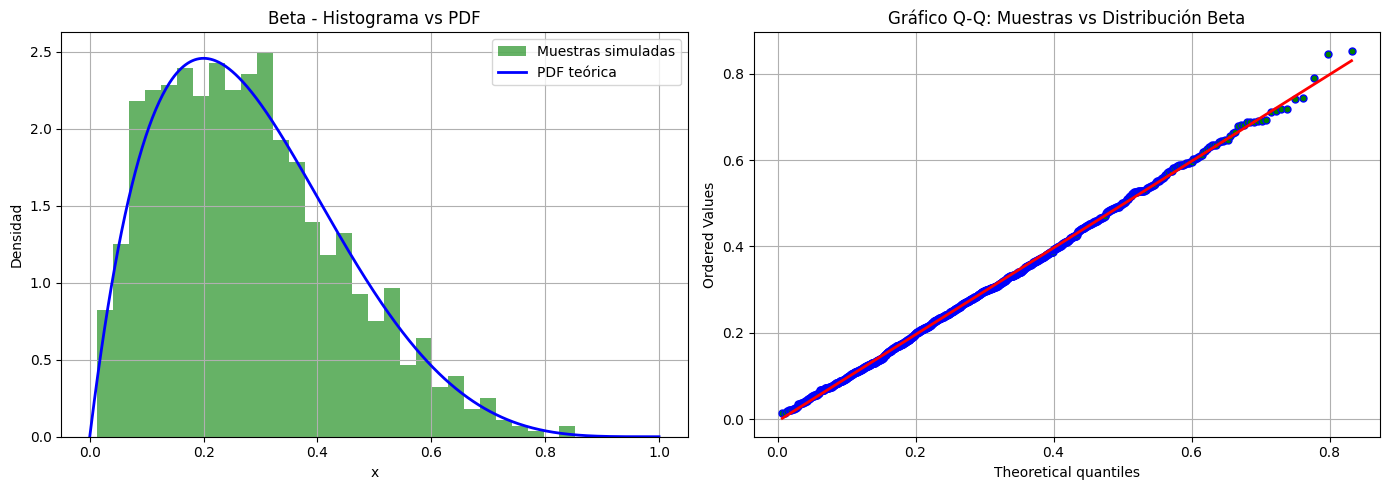

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def gamma_mt(alpha, n=1):
    """Simula n variables gamma(α, 1) usando el método Marsaglia-Tsang (α ≥ 1)"""
    if alpha < 1:
        # Ahrens-Dieter
        result = []
        for _ in range(n):
            while True:
                u1, u2 = np.random.rand(2)
                t = 1 + 0.3678794 * alpha  # ~1/e
                if u1 <= 1 / t:
                    x = (t * u1) ** (1 / alpha)
                else:
                    x = -np.log(t * (1 - u1) / alpha)
                if u2 <= np.exp(-x):
                    result.append(x)
                    break
        return np.array(result)
    else:
        # Marsaglia-Tsang
        d = alpha - 1 / 3
        c = 1 / np.sqrt(9 * d)
        result = []
        while len(result) < n:
            z = np.random.randn()
            u = np.random.rand()
            if z > -1 / c:
                v = (1 + c * z) ** 3
                if np.log(u) < 0.5 * z**2 + d - d * v + d * np.log(v):
                    result.append(d * v)
        return np.array(result)

def simular_beta(alpha, beta, n=1000):
    """
    Simula n muestras de una distribución Beta(α, β) usando cociente de dos gammas.
    """
    x = gamma_mt(alpha, n)
    y = gamma_mt(beta, n)
    return x / (x + y)

# Parámetros
alpha = 2
beta = 5
n = 1000

# Simulación
muestras = simular_beta(alpha, beta, n)

# PDF teórica
x_vals = np.linspace(0, 1, 500)
pdf = stats.beta.pdf(x_vals, alpha, beta)

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma vs PDF
ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x_vals, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Beta - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q
stats.probplot(muestras, dist="beta", sparams=(alpha, beta), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Beta')
ax2.grid(True)

plt.tight_layout()
plt.show()



# Distribución Pearson Tipo III

### Nomenclatura estándar
**Notación**:  
$X \sim \text{PearsonIII}(\alpha, \beta, \gamma)$

### Parámetros
- $\alpha$: parámetro de forma ($\alpha > 0$)
- $\beta$: parámetro de escala ($\beta > 0$)
- $\gamma$: parámetro de ubicación ($\gamma \in \mathbb{R}$)
- **Soporte**: $x > \gamma$

## Función de Densidad de Probabilidad (PDF)
$$
f(x) = \frac{(x-\gamma)^{\alpha-1} e^{-\frac{x-\gamma}{\beta}}}{\beta^\alpha \Gamma(\alpha)} \quad \text{para } x > \gamma \text{ cuando } \beta > 0
$$

## Función de Distribución Acumulada (CDF)
$$
F(x) =
\begin{cases}
\frac{1}{\Gamma(\alpha)} \gamma\left(\alpha, \frac{x-\gamma}{\beta}\right) & \text{para } \beta > 0 \\
1 - \frac{1}{\Gamma(\alpha)} \gamma\left(\alpha, \frac{x-\gamma}{\beta}\right) & \text{para } \beta < 0
\end{cases}
$$

## Medidas Estadísticas

- **Media**:  $\mu = \gamma + \alpha\beta$

- **Varianza**: $\sigma^2 = \alpha\beta^2$

- **Moda**:  $\gamma + (\alpha-1)\beta$   *(Solo cuando $\alpha \geq 1$)*

- **Sesgo**: $\frac{2}{\sqrt{\alpha}}$  *(Siempre positivo si $\beta > 0$)*


### Pseudocódigo para simulación


```
# FUNCIÓN simular_pearson3(α, β, γ, n):
    ENTRADA:
        α: parámetro de forma
        β: parámetro de escala
        γ: parámetro de ubicación
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Pearson III
    
    SI α == 1:
        RETORNAR [γ + simular_exponencial(1/β, n)]
    SINO:
        gamma_samples = simular_gamma(α, 1/β, n)
        RETORNAR [x + γ for x in gamma_samples]
```




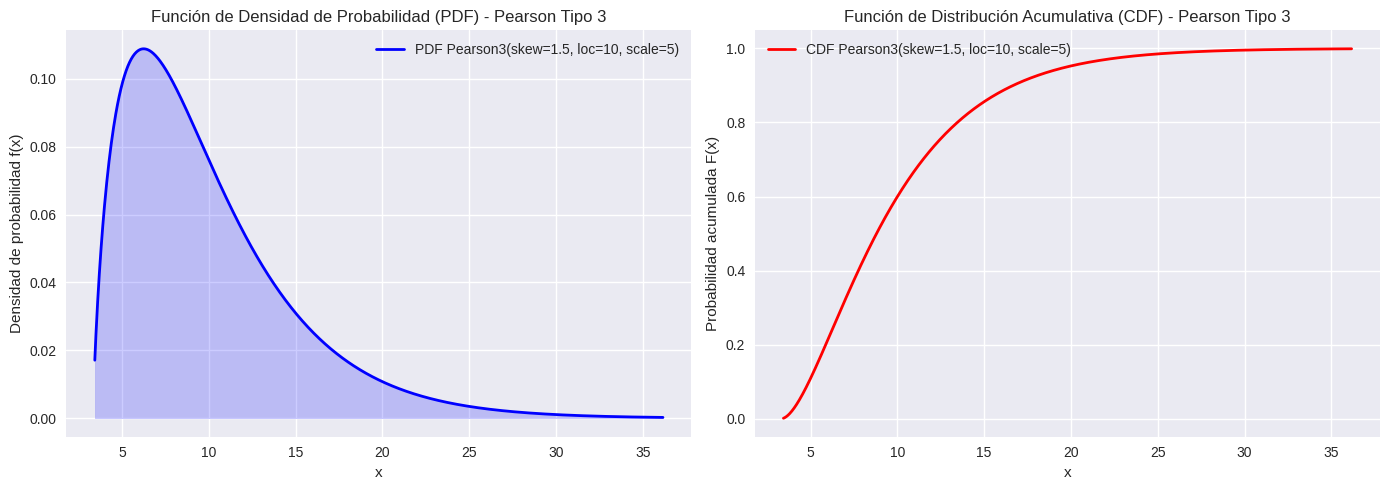

Elección del Método
- Si $\alpha$ es entero:
Transformada Inversa: Simplemente sumar $\alpha$ variables exponenciales. Muy eficiente para enteros pequeños.

- Si $\alpha$ < 1 o no entero:
Método de Aceptación y Rechazo (Best's o Marsaglia-Tsang): Recomendado por su eficiencia general.

- Si $\alpha$ es grande (>5):
Normal Aproximada (por teorema central del límite): Solo en simulaciones no críticas.

Entrada:
Parámetros: $\alpha > 0$ (forma), $\beta > 0$ (escala), $\mu$ (desplazamiento)

Salida: Variable aleatoria $Y \sim \text{Pearson III}(\alpha, \beta, \mu)$


```
# Pseudocódigo (Marsaglia-Tsang)


Si alpha < 1:
    # Usa la relación: Gamma(alpha) = Gamma(alpha + 1) * U^(1/alpha)
    1. Generar U ~ U(0,1)
    2. Simular X ~ Gamma(alpha + 1, 1) usando Marsaglia-Tsang
    3. x = X * U^(1/alpha)
Sino:
    1. d = alpha - 1/3
    2. c = 1 / sqrt(9*d)
    3. Repetir:
         a. Generar Z ~ Normal(0,1)   ← Usar Box-Muller o numpy
         b. V = (1 + c*Z)^3
         c. Si V ≤ 0: continuar
         d. U ~ U(0,1)
         e. Aceptar si ln(U) < 0.5 * Z² + d*(1 - V + ln(V))
    4. x = d * V

4. Escalar: x = x * beta
5. Desplazar: y = x + mu
6. Devolver y

```



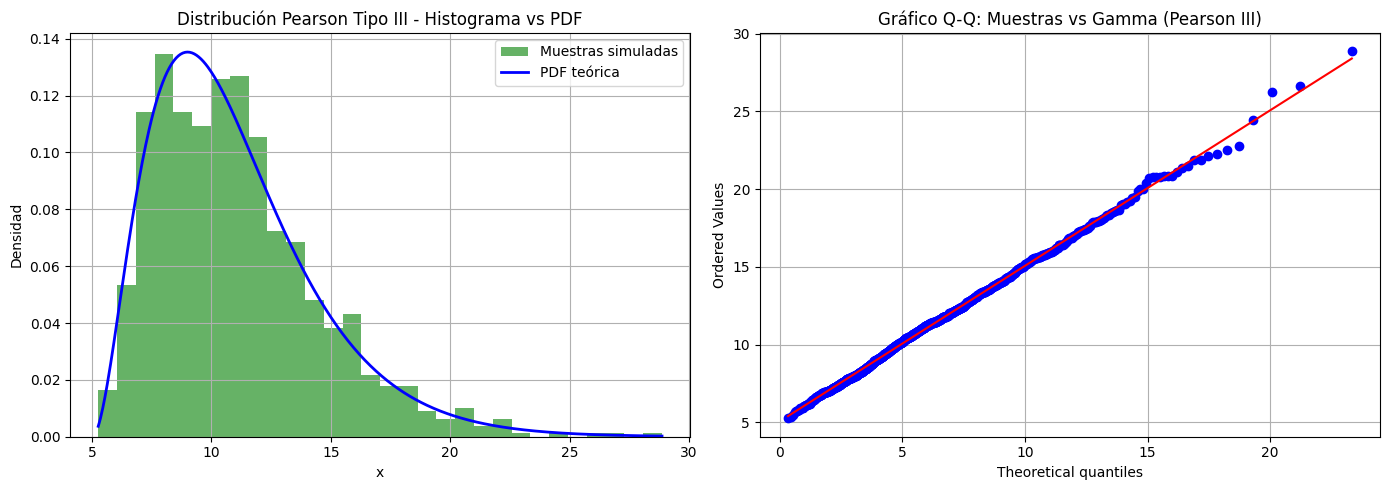

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def gamma_mt(alpha, n=1):
    """Simula n variables gamma(α, 1) usando el método Marsaglia-Tsang (α ≥ 1) o Ahrens-Dieter (α < 1)"""
    if alpha < 1:
        result = []
        for _ in range(n):
            while True:
                u1, u2 = np.random.rand(2)
                t = 1 + 0.3678794 * alpha
                if u1 <= 1 / t:
                    x = (t * u1) ** (1 / alpha)
                else:
                    x = -np.log(t * (1 - u1) / alpha)
                if u2 <= np.exp(-x):
                    result.append(x)
                    break
        return np.array(result)
    else:
        d = alpha - 1/3
        c = 1 / np.sqrt(9 * d)
        result = []
        while len(result) < n:
            z = np.random.randn()
            u = np.random.rand()
            if z > -1 / c:
                v = (1 + c * z) ** 3
                if np.log(u) < 0.5 * z**2 + d - d * v + d * np.log(v):
                    result.append(d * v)
        return np.array(result)

def simular_pearson3(alpha, beta, gamma, n=1000):
    """
    Simula n muestras de la distribución Pearson Tipo III con parámetros:
    alpha (shape), beta (scale), gamma (location).
    """
    gamma_samples = gamma_mt(alpha, n) * beta  # Escalamos la gamma
    return gamma_samples + gamma

# Ejemplo de simulación
alpha = 3.0   # shape
beta = 2.0    # scale
gamma_loc = 5.0  # location (shift)

muestras = simular_pearson3(alpha, beta, gamma_loc, n=1000)

# Graficar
x = np.linspace(min(muestras), max(muestras), 500)
pdf = stats.gamma.pdf(x - gamma_loc, a=alpha, scale=beta)  # PDF desplazada

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución Pearson Tipo III - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

stats.probplot(muestras, dist=stats.gamma, sparams=(alpha, 0, beta), plot=ax2)
ax2.set_title('Gráfico Q-Q: Muestras vs Gamma (Pearson III)')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Distribución Log-logística

## Nomenclatura estándar
**Notación**:  
$X \sim \text{LL}(\alpha, \beta)$

## Parámetros
- $\alpha$: parámetro de escala ($\alpha > 0$)
- $\beta$: parámetro de forma ($\beta > 0$)
- **Soporte**: $x \geq 0$

## Función de Densidad de Probabilidad (PDF)
$$
f(x) = \frac{(\beta/\alpha)(x/\alpha)^{\beta-1}}{[1 + (x/\alpha)^\beta]^2}
$$

## Función de Distribución Acumulada (CDF)
$$
F(x) = \frac{1}{1 + (x/\alpha)^{-\beta}} = \frac{(x/\alpha)^\beta}{1 + (x/\alpha)^\beta}
$$

## Medidas estadísticas

- **Media**: $\mu = \frac{\alpha\pi/\beta}{\sin(\pi/\beta)}$  *(Solo existe para $\beta > 1$)*

- **Varianza**:  $\sigma^2 = \alpha^2\left(\frac{2\pi/\beta}{\sin(2\pi/\beta)} - \frac{(\pi/\beta)^2}{\sin^2(\pi/\beta)}\right)$  *(Requiere $\beta > 2$)*

- **Moda**: $\alpha\left(\frac{\beta-1}{\beta+1}\right)^{1/\beta}$  *(Válido para $\beta > 1$)*

- **Sesgo**:  *Asimetría positiva compleja (depende de $\beta$)*

### Notas clave:
1. $\alpha$ = parámetro de escala (>0)
2. $\beta$ = parámetro de forma (>0)
3. Las fórmulas se simplifican cuando $\beta=2$ (caso Rayleigh)

## Pseudocódigo para simulación

```
# FUNCIÓN simular_loglogistica(α, β, n):
    ENTRADA:
        α: parámetro de escala
        β: parámetro de forma
        n: tamaño de muestra
    SALIDA:
        muestra de n valores log-logísticos
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        u = random()  # Uniforme(0,1)
        x = α * (u/(1 - u))^(1/β)
        muestra.agregar(x)
    RETORNAR muestra
```



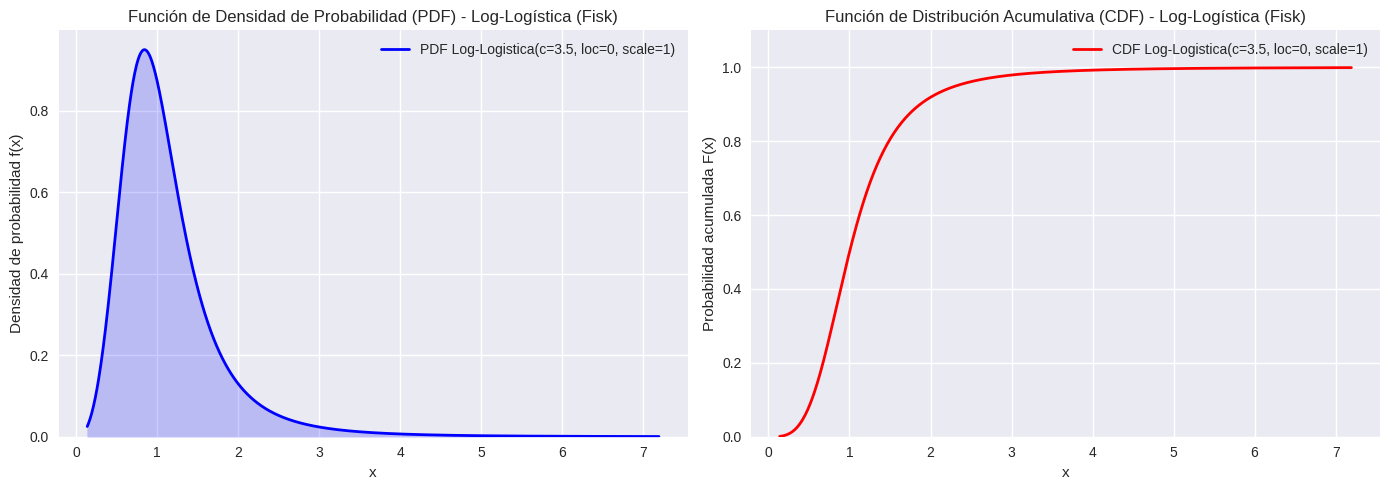

**¿Por qué la Transformada Inversa?**

1. **Exactitud**  
   Genera muestras exactas sin aproximaciones.

2. **Eficiencia**  
   Solo requiere una variable uniforme $U \sim \text{Unif}(0,1)$ y la transformación:  
   $$X = \alpha \left(\frac{U}{1-U}\right)^{1/\beta}$$

3.* **Fundamento teórico**  
   La CDF es invertible analíticamente:  
   $$F(x) = \frac{1}{1 + (x/\alpha)^{-\beta}}$$  
   $$F^{-1}(u) = \alpha \left(\frac{u}{1-u}\right)^{1/\beta}$$

**Ventaja sobre otros métodos:**

- **Aceptación-Rechazo**: Innecesario (la transformada inversa es exacta y más rápida)
- **Box-Muller/Método de las 12 uniformes**: Solo aplicable a distribuciones normales
- **Composición**: No aplicable (no es mezcla de distribuciones simples)




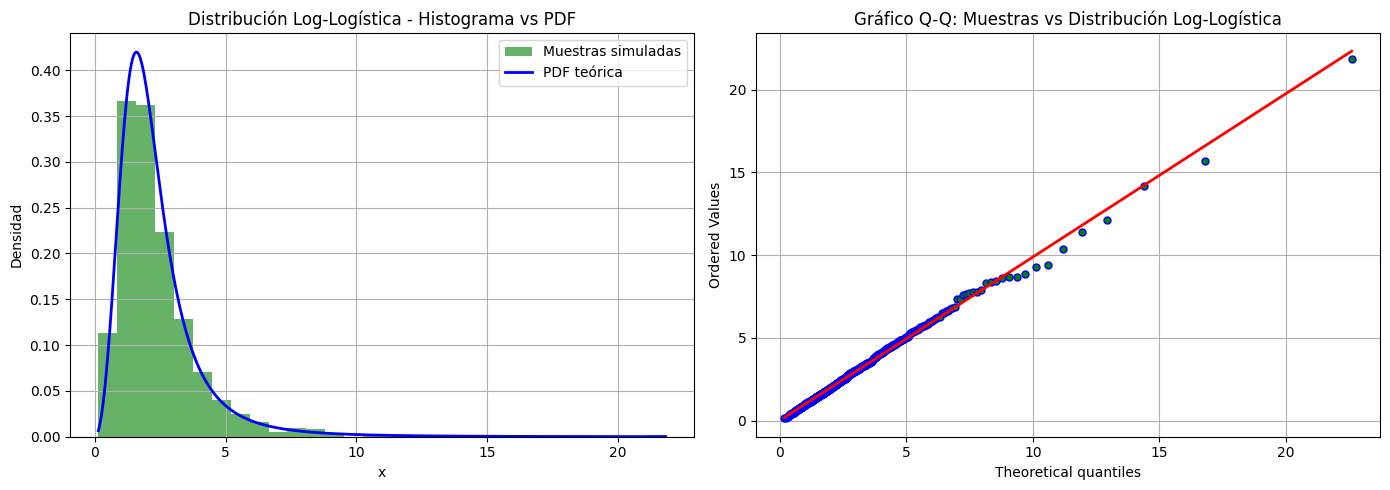

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_loglogistica(alpha, beta, n=1000):
    """
    Simula n muestras de una distribución Log-Logística con parámetros alpha (escala) y beta (forma)
    usando el método de la transformada inversa.
    """
    u = np.random.rand(n)
    x = alpha * (u / (1 - u))**(1 / beta)
    return x

# Ejemplo de simulación
alpha = 2.0  # parámetro de escala
beta = 3.0   # parámetro de forma
n = 1000

muestras = simular_loglogistica(alpha, beta, n)

# PDF teórica para comparación
# Para la distribución log-logística, x > 0.
x_vals = np.linspace(np.min(muestras[muestras > 0]), np.max(muestras), 500)
pdf = ( (beta / alpha) * (x_vals / alpha)**(beta - 1) ) / (1 + (x_vals / alpha)**beta)**2

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(muestras, bins=30, density=True, alpha=0.6, color='g', label='Muestras simuladas')
ax1.plot(x_vals, pdf, 'b-', lw=2, label='PDF teórica')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución Log-Logística - Histograma vs PDF')
ax1.legend()
ax1.grid(True)

# Gráfico Q-Q usando scipy.stats.fisk (equivalente a Log-Logística)
stats.probplot(muestras, dist="fisk", sparams=(beta, 0, alpha), plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('g')
ax2.get_lines()[0].set_markersize(5.0)
ax2.get_lines()[1].set_linewidth(2.0)
ax2.set_title('Gráfico Q-Q: Muestras vs Distribución Log-Logística')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Distribución Johnson

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Johnson}(\gamma, \delta, \lambda, \xi, \text{tipo})$

## Parámetros
- $\gamma$: parámetro de forma ($\gamma \in \mathbb{R}$)
- $\delta$: parámetro de forma ($\delta > 0$)
- $\lambda$: parámetro de escala ($\lambda > 0$)
- $\xi$: parámetro de ubicación ($\xi \in \mathbb{R}$)
- **tipo**:
  - $S_U$: Sistema no acotado
  - $S_B$: Sistema acotado
  - $S_L$: Sistema lognormal

## Sistemas de transformación



### Sistema $S_U$ (No acotado)
## Características principales
- **Aplicación**: Variables no acotadas ($X \in \mathbb{R}$) con colpes pesadas
- **Transformación**:
  $$
  Z = \gamma + \delta \sinh^{-1}\left(\frac{X - \xi}{\lambda}\right)
  $$
  donde $Z \sim N(0,1)$

### Función de Densidad (PDF)
$$
f_X(x) = \frac{\delta}{\sqrt{2\pi}} \cdot \frac{1}{\sqrt{(x-\xi)^2 + \lambda^2}} \cdot \exp\left(-\frac{1}{2}\left[\gamma + \delta \sinh^{-1}\left(\frac{x-\xi}{\lambda}\right)\right]^2\right)
$$

### Función de Distribución (CDF)
$$
F_X(x) = \Phi\left(\gamma + \delta \sinh^{-1}\left(\frac{x-\xi}{\lambda}\right)\right)
$$

Donde $\Phi(\cdot)$ es la CDF normal estándar

## Medidas estadísticas

- **Media ($\mu$)**
$$
\mu = \xi - \lambda e^{1/(2\delta^2)} \sinh\left(\frac{\gamma}{\delta}\right)
$$

- **Varianza ($\sigma^2$)**
$$
\sigma^2 = \frac{\lambda^2}{2} \left(e^{1/\delta^2} - 1\right) \left(e^{1/\delta^2} \cosh\left(\frac{2\gamma}{\delta}\right) + 1\right)
$$

- **Moda**
$$
\text{Moda} = \xi + \lambda \sinh\left(-\frac{\gamma}{\delta}\right)
$$

- **Sesgo ($\gamma_1$)**
$$
\gamma_1 = -\frac{e^{1/(2\delta^2)} \sinh\left(\frac{3\gamma}{\delta}\right)}{\left(\frac{e^{1/\delta^2} - 1}{2}\right)^{3/2}}
$$

---

### Sistema $S_B$ (Acotado)

## Características principales
- **Aplicación**: Variables acotadas en intervalo finito ($\xi < X < \xi+\lambda$)
- **Transformación**:
  $$
  Z = \gamma + \delta \ln\left(\frac{X - \xi}{\xi + \lambda - X}\right)
  $$
  donde $Z \sim N(0,1)$

### Función de Densidad (PDF)
$$
f_X(x) = \frac{\delta}{\sqrt{2\pi}} \cdot \frac{\lambda}{(x-\xi)(\xi+\lambda-x)} \cdot \exp\left(-\frac{1}{2}\left[\gamma + \delta \ln\left(\frac{x-\xi}{\xi+\lambda-x}\right)\right]^2\right)
$$

**Dominio**: $\xi < x < \xi + \lambda$

### Función de Distribución (CDF)
$$
F_X(x) = \Phi\left(\gamma + \delta \ln\left(\frac{x-\xi}{\xi+\lambda-x}\right)\right)
$$

**Nota**: $\Phi(\cdot)$ = CDF normal estándar

## Medidas estadísticas

- **Media ($\mu$)**  
  $\mu \approx \xi + \frac{\lambda}{2}\left(1 + \frac{e^{-\gamma/\delta}\sinh(1/\delta)}{\sqrt{1 + e^{-2\gamma/\delta}\sinh^2(1/\delta)}}\right)$  
  *(Requiere evaluación numérica para mayor precisión)*

- **Varianza ($\sigma^2$)**  
  $\sigma^2 \approx \frac{\lambda^2}{4}\left(1 - \frac{e^{-2\gamma/\delta}\sinh^2(1/\delta)}{1 + e^{-2\gamma/\delta}\sinh^2(1/\delta)}\right)$

- **Moda**  
  $\text{Moda} \approx \xi + \frac{\lambda}{2}\left(1 - \frac{\gamma}{\delta}\right)$  
  *(Aproximación válida cuando $\delta > 1$)*

- **Sesgo ($\gamma_1$)**  
  $\gamma_1 \approx \text{Signo}(\gamma) \cdot f(\gamma,\delta)$  
  *(Puede ser positivo o negativo dependiendo de $\gamma/\delta$)*


---
# Sistema $S_L$ (Log-normal de Johnson)

## Características principales
- **Aplicación**: Variables acotadas inferiormente ($X > \xi$) con asimetría positiva
- **Transformación**:
  $$
  Z = \gamma + \delta \ln\left(\frac{X - \xi}{\lambda}\right)
  $$
  donde $Z \sim N(0,1)$



## Funciones de distribución

### Función de Densidad (PDF)
$$
f_X(x) = \frac{\delta}{\sqrt{2\pi}} \cdot \frac{1}{(x-\xi)} \cdot \exp\left(-\frac{1}{2}\left[\gamma + \delta \ln\left(\frac{x-\xi}{\lambda}\right)\right]^2\right), \quad x > \xi
$$

### Función de Distribución (CDF)
$$
F_X(x) = \Phi\left(\gamma + \delta \ln\left(\frac{x-\xi}{\lambda}\right)\right), \quad x > \xi
$$
*Donde $\Phi(\cdot)$ es la CDF normal estándar*

## Propiedades clave
1. Relación con la log-normal estándar cuando:
   - $\gamma = -\delta\ln\lambda$
   - $\xi = 0$

## Medidas estadísticas

- **Media ($\mu$)**  
  $\mu = \xi + \lambda e^{-\gamma/\delta} e^{1/(2\delta^2)}$

- **Varianza ($\sigma^2$)**  
  $\sigma^2 = \lambda^2 e^{-2\gamma/\delta} (e^{2/\delta^2} - e^{1/\delta^2)}$

- **Moda**  
  $\text{Moda} = \xi + \lambda e^{-\gamma/\delta} e^{-1/\delta^2}$

- **Sesgo ($\gamma_1$)**  
  $\gamma_1 = (e^{1/\delta^2} + 2)\sqrt{e^{1/\delta^2} - 1}$  
  *(Siempre positivo → asimetría derecha)*

## Pseudocódigo para simulación
```
# FUNCIÓN simular_johnson(γ, δ, λ, ξ, tipo, n):
    ENTRADA:
        γ, δ: parámetros de forma
        λ, ξ: parámetros de ubicación/escala
        tipo: tipo de transformación ("S_U", "S_B", "S_L")
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Johnson
    
    z = simular_normal(0, 1, n)  # Generar normales estándar
    muestra = []
    PARA zi EN z:
        SI tipo == "S_U":
            x = ξ + λ * sinh((zi - γ)/δ)
        SI tipo == "S_B":
            u = 1/(1 + exp(-(zi - γ)/δ))
            x = ξ + λ * u
        SI tipo == "S_L":
            x = ξ + λ * exp((zi - γ)/δ)
        muestra.agregar(x)
    RETORNAR muestra
```



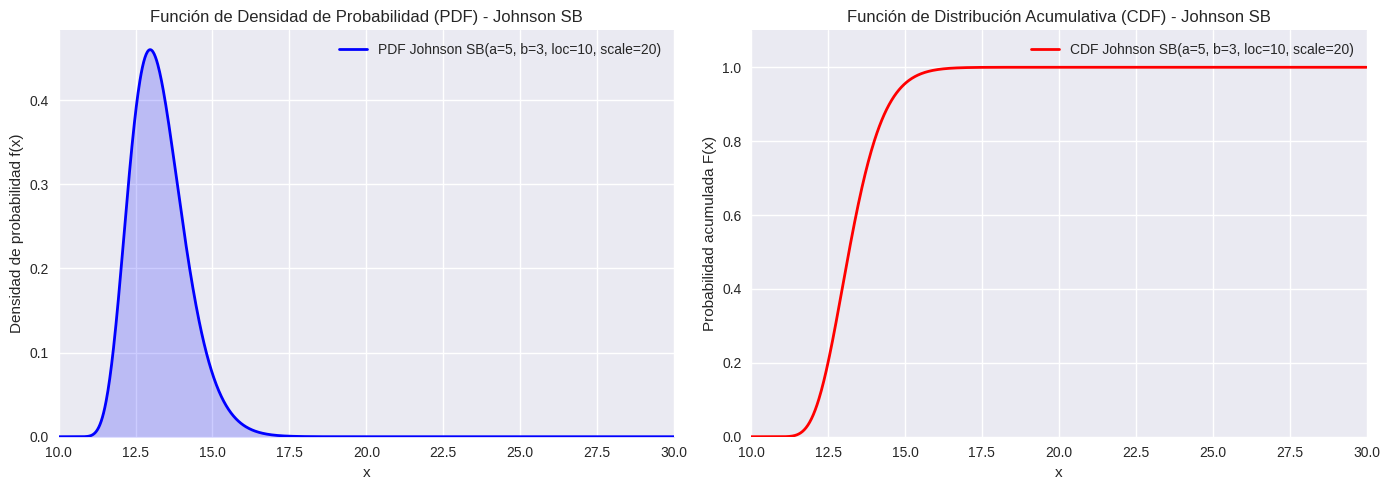

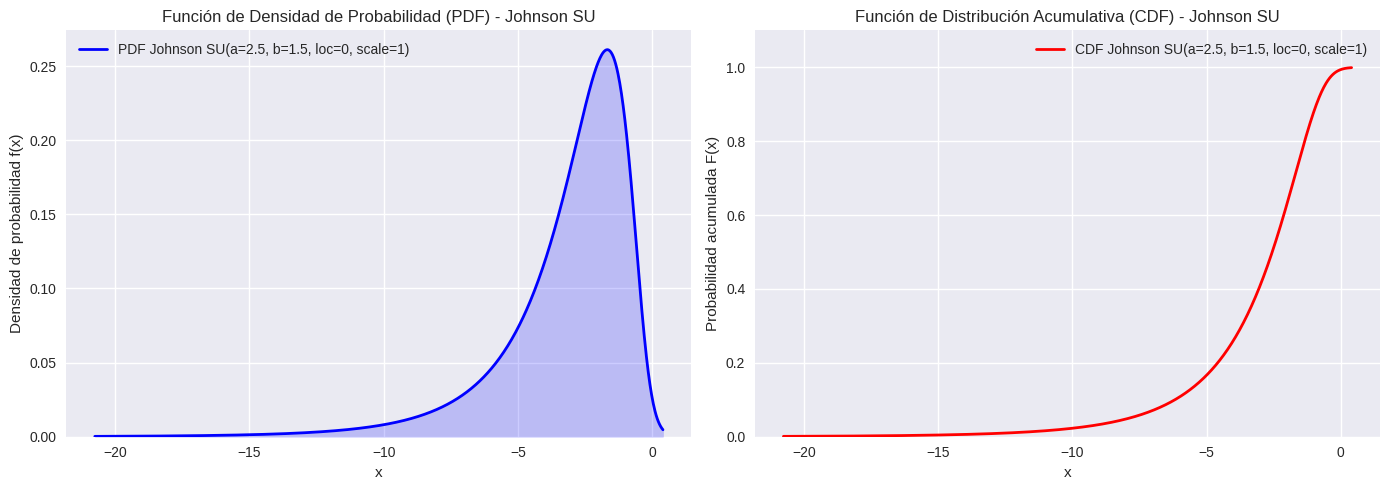

**Método Recomendado: Transformada Inversa Basada en Normal**

La distribución Johnson se define como una transformación de una variable normal $Z \sim N(0,1)$:

$$
X = \xi + \lambda \cdot T\left(\frac{Z - \gamma}{\delta}\right)
$$

donde $T(\cdot)$ depende de la familia:

- **$S_U$ (Unbounded)**: $T(y) = \sinh(y)$
- **$S_B$ (Bounded)**: $T(y) = \frac{e^y}{1 + e^y}$
- **$S_L$ (Lognormal)**: $T(y) = e^y$


**Ventajas:**

1. **Exactitud**: La transformación es matemáticamente exacta.
2. **Eficiencia**: Solo requiere generar normales (Box-Muller) y aplicar una transformación.
3. **Flexibilidad**: Cubre todas las subfamilias Johnson.


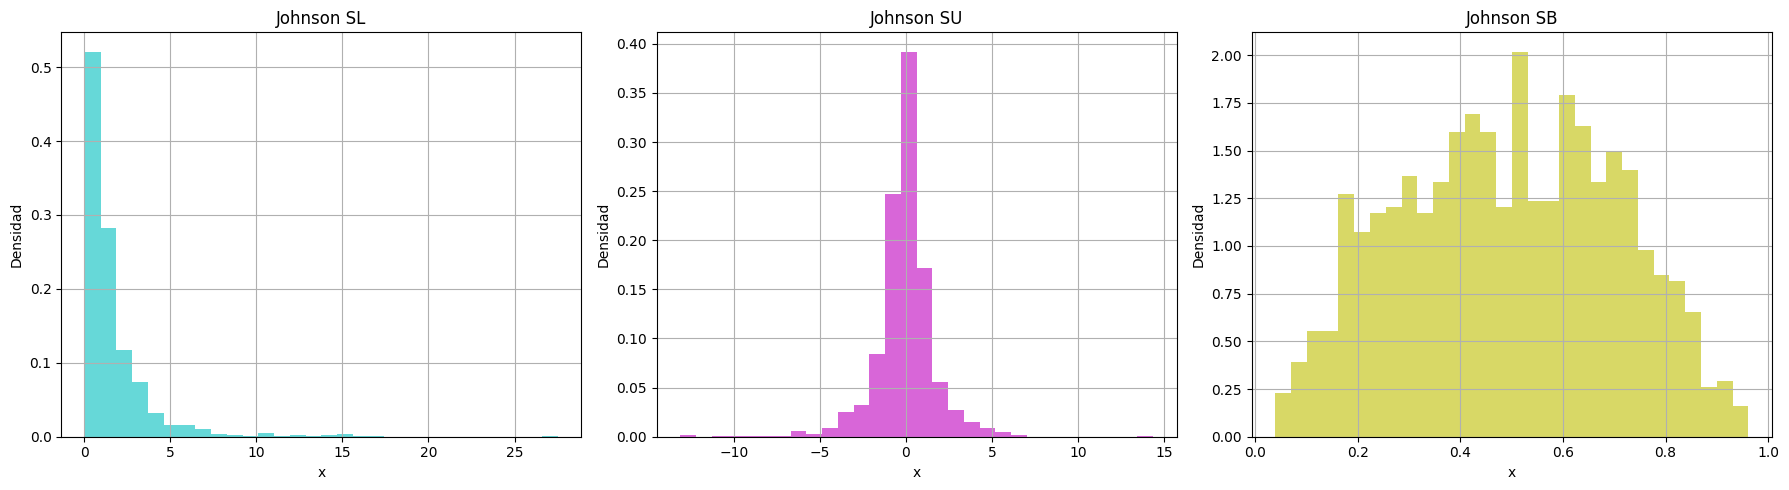

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simular_johnson_SL(gamma, delta, lambd, xi, n=1000):
    """Simula Johnson SL (Lognormal)"""
    Z = np.random.randn(n)
    X = xi + lambd * np.exp((Z - gamma) / delta)
    return X

def simular_johnson_SU(gamma, delta, lambd, xi, n=1000):
    """Simula Johnson SU (unbounded)"""
    Z = np.random.randn(n)
    X = xi + lambd * np.sinh((Z - gamma) / delta)
    return X

def simular_johnson_SB(gamma, delta, lambd, xi, n=1000):
    """Simula Johnson SB (bounded)"""
    Z = np.random.randn(n)
    X = xi + lambd / (1 + np.exp(-(Z - gamma) / delta))
    return X

# Parámetros ejemplo
gamma = 0.0
delta = 1.0
lambd = 1.0
xi = 0.0
n = 1000

# Simular muestras
muestras_SL = simular_johnson_SL(gamma, delta, lambd, xi, n)
muestras_SU = simular_johnson_SU(gamma, delta, lambd, xi, n)
muestras_SB = simular_johnson_SB(gamma, delta, lambd, xi, n)

# Graficar histogramas
fig, axs = plt.subplots(1, 3, figsize=(18,5))

axs[0].hist(muestras_SL, bins=30, density=True, alpha=0.6, color='c')
axs[0].set_title('Johnson SL')

axs[1].hist(muestras_SU, bins=30, density=True, alpha=0.6, color='m')
axs[1].set_title('Johnson SU')

axs[2].hist(muestras_SB, bins=30, density=True, alpha=0.6, color='y')
axs[2].set_title('Johnson SB')

for ax in axs:
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad')

plt.tight_layout()
plt.show()


# Distribución Uniforme Discreta

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Unif}\{a, b\}$

## Parámetros
- $a$: mínimo ($a \in \mathbb{Z}$)
- $b$: máximo ($b \geq a$, $b \in \mathbb{Z}$)
- **Soporte**: $x \in \{a, a+1, \ldots, b\}$

## Función de Masa de Probabilidad (PMF)
$$
P(X = k) = \frac{1}{b - a + 1} \quad \text{para } k \in \{a, \ldots, b\}
$$

## Función de Distribución Acumulativa (CDF)
  $$ F(k) = \frac{\lfloor k \rfloor - a + 1}{b - a + 1} \quad \text{para } a \leq k \leq b $$

## Medidas estadísticas
- **Media**:
  $$\mu = \frac{a + b}{2}$$
- **Varianza**:
  $$\sigma^2 = \frac{(b - a + 1)^2 - 1}{12}$$

## Pseudocódigo para simulación
```
FUNCIÓN simular_uniforme_discreta(a, b, n):
    ENTRADA:
        a: límite inferior (entero)
        b: límite superior (entero)
        n: tamaño de muestra
    SALIDA:
        muestra de n valores uniformes discretos
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        u = random()  # Uniforme(0,1)
        k = a + floor((b - a + 1) * u)
        muestra.agregar(k)
    RETORNAR muestra
```

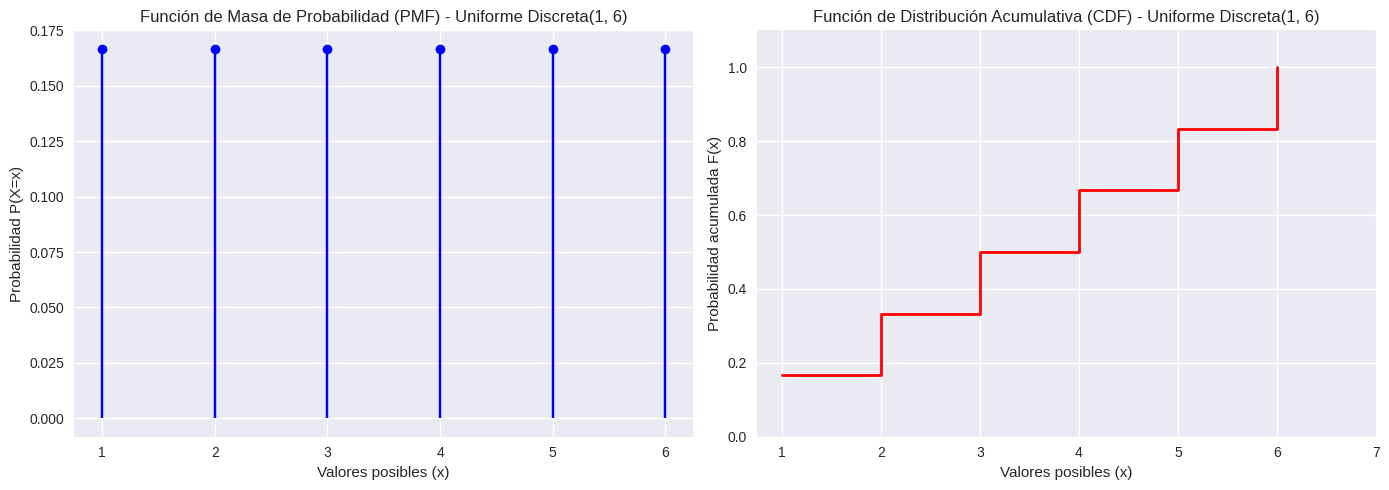

Para simular una distribución uniforme discreta en el conjunto de valores enteros $\{a, a+1, \ldots, b\}$ (donde $a \leq b$), el método más eficiente y directo es la **Transformada Inversa** utilizando el método de búsqueda de tablas (table lookup), ya que la CDF es trivialmente invertible y no requiere aproximaciones complejas.

**¿Por qué la Transformada Inversa?**

1. **Exactitud**:  
   Genera muestras exactas sin sesgo.

2. **Eficiencia**:  
   Solo requiere:
   - Generar una uniforme $U \sim \text{Unif}(0,1)$
   - Aplicar una operación de escalamiento y discretización:  
     $$X = a + \lfloor (b-a+1)U \rfloor$$


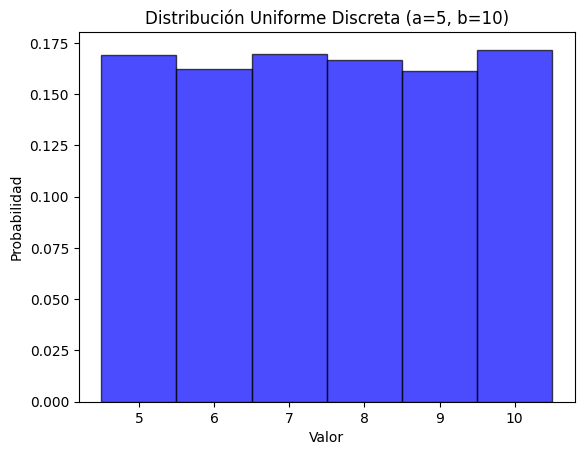

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def uniforme_discreta(a, b, size=1):
    U = np.random.uniform(0, 1, size)
    X = a + np.floor((b - a + 1) * U).astype(int)
    return X

# Ejemplo: valores entre 5 y 10 (incluyendo ambos)
a, b = 5, 10
muestras = uniforme_discreta(a, b, 10000)

# Visualización
plt.hist(muestras, bins=np.arange(a-0.5, b+1.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribución Uniforme Discreta (a={a}, b={b})')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.xticks(np.arange(a, b+1))
plt.show()

# Distribución Bernoulli

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Bern}(p)$

## Parámetros
- $p$: probabilidad de éxito ($0 \leq p \leq 1$)
- **Soporte**: $x \in \{0, 1\}$

## Función de Masa de Probabilidad (PMF)
$$
P(X = k) =
\begin{cases}
p & \text{si } k = 1 \\
1-p & \text{si } k = 0
\end{cases}
$$

## Función de Distribución Acumulada (CDF)
$$
F(X \leq x) =
\begin{cases}
0 & \text{si } x < 0, \\
1-p & \text{si } 0 \leq x < 1, \\
1 & \text{si } x \geq 1.
\end{cases}
$$


## Medidas estadísticas
- **Media**: $\mu = p$
- **Varianza**: $\sigma^2 = p(1-p)$
- **Moda**:
 $$
\text{Moda} =
\begin{cases}
0 & \text{si } p < 0.5, \\
\{0,1\} & \text{si } p = 0.5, \\
1 & \text{si } p > 0.5.
\end{cases}
$$

*Bimodal cuando $p=0.5$ (ambos valores igualmente probables)*

- **Sesgo ($\gamma_1$)**
$$
\gamma_1 = \frac{1-2p}{\sqrt{p(1-p)}}
$$

**Interpretación del sesgo**:
- **Negativo** cuando $p > 0.5$ (cola a la izquierda)
- **Positivo** cuando $p < 0.5$ (cola a la derecha)
- **Simétrica** cuando $p = 0.5$



## Pseudocódigo para simulación
```
FUNCIÓN simular_bernoulli(p, n):
    ENTRADA:
        p: probabilidad de éxito
        n: tamaño de muestra
    SALIDA:
        muestra de n valores Bernoulli
    
    muestra = []
    PARA i DESDE 1 HASTA n:
        u = random()  # Uniforme(0,1)
        SI u <= p:
            muestra.agregar(1)
        SINO:
            muestra.agregar(0)
    RETORNAR muestra
```

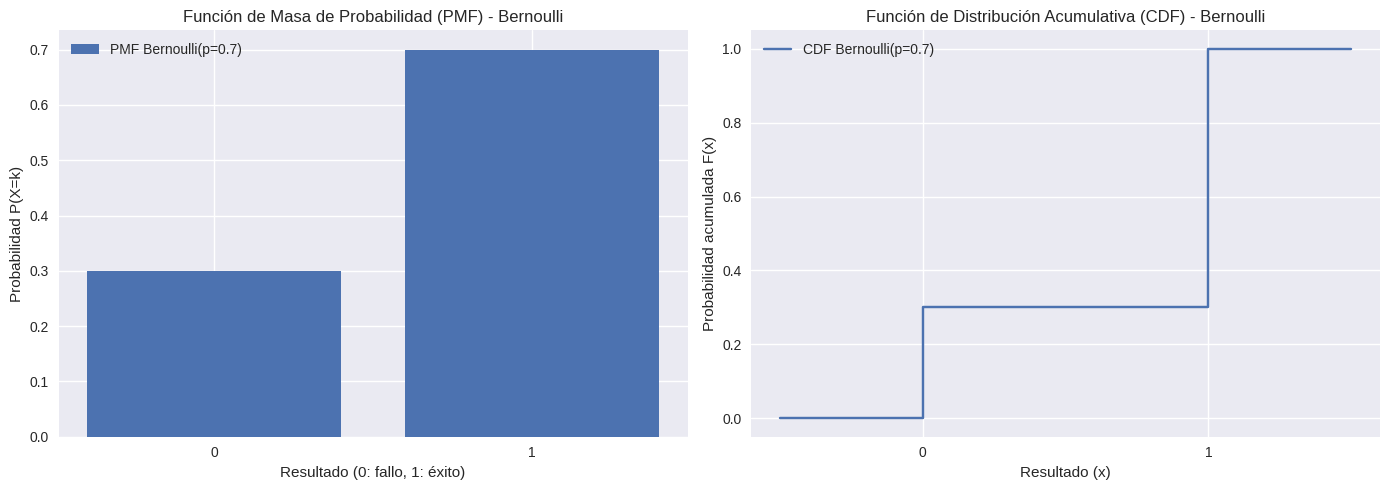

Para simular una distribución Bernoulli con parámetro $p$ (probabilidad de éxito), el método más eficiente y directo es la **Transformada Inversa**, debido a su simplicidad y bajo costo computacional. Aquí te explico por qué y cómo implementarlo:

**¿Por qué la Transformada Inversa?**

1. **Exactitud**:  
   Genera muestras exactas sin sesgo.

2. **Eficiencia**:  
   Solo requiere:
   - Generar una variable uniforme $U \sim \text{Unif}(0,1)$
   - Realizar una comparación simple

3. **Simplicidad**:  
   La CDF de Bernoulli es una función escalonada con inversa trivial:
   $$
   X = \begin{cases}
   1 & \text{si } U \leq p, \\
   0 & \text{si } U > p.
   \end{cases}
   $$



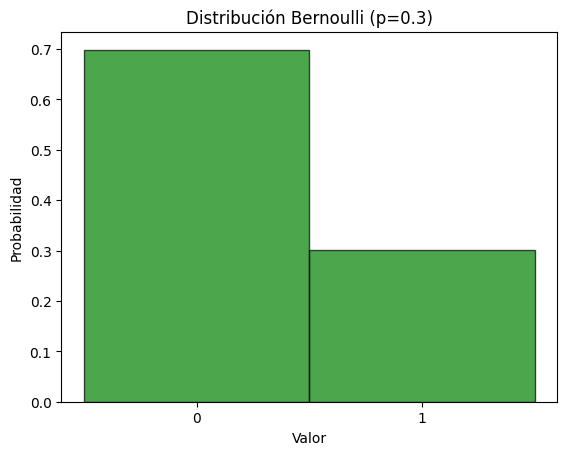

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(p, size=1):
    U = np.random.uniform(0, 1, size)
    X = (U <= p).astype(int)  # Convierte True/False a 1/0
    return X

# Ejemplo: p = 0.3 (30% de probabilidad de éxito)
p = 0.3
muestras = bernoulli(p, 10000)

# Visualización
plt.hist(muestras, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7, color='green', edgecolor='black')
plt.xticks([0, 1])
plt.title(f'Distribución Bernoulli (p={p})')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.show()

# Distribución Geométrica

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Geom}(p)$

## Parámetros
- $p$: probabilidad de éxito ($0 < p \leq 1$)
- **Soporte**: $k \in \{1, 2, 3, \ldots\}$ (número de intentos hasta primer éxito)

## Función de Masa de Probabilidad (PMF)
$$
P(X = k) = (1 - p)^{k-1} p
$$

## Función de Distribución Acumulada (CDF)
$$ F(k) = 1 - (1-p)^k \quad \text{para } k \geq 0 $$

## Medidas estadísticas
- **Media**: $\mu = \frac{1}{p}$
- **Varianza**: $\sigma^2 = \frac{1 - p}{p^2}$
- **Moda**: $1$ (siempre)

## Pseudocódigo para simulación
```
1. Generar U ~ Uniforme(0, 1).
2. Calcular X = floor(ln(U) / ln(1 - p)) + 1.
3. Devolver X.
```


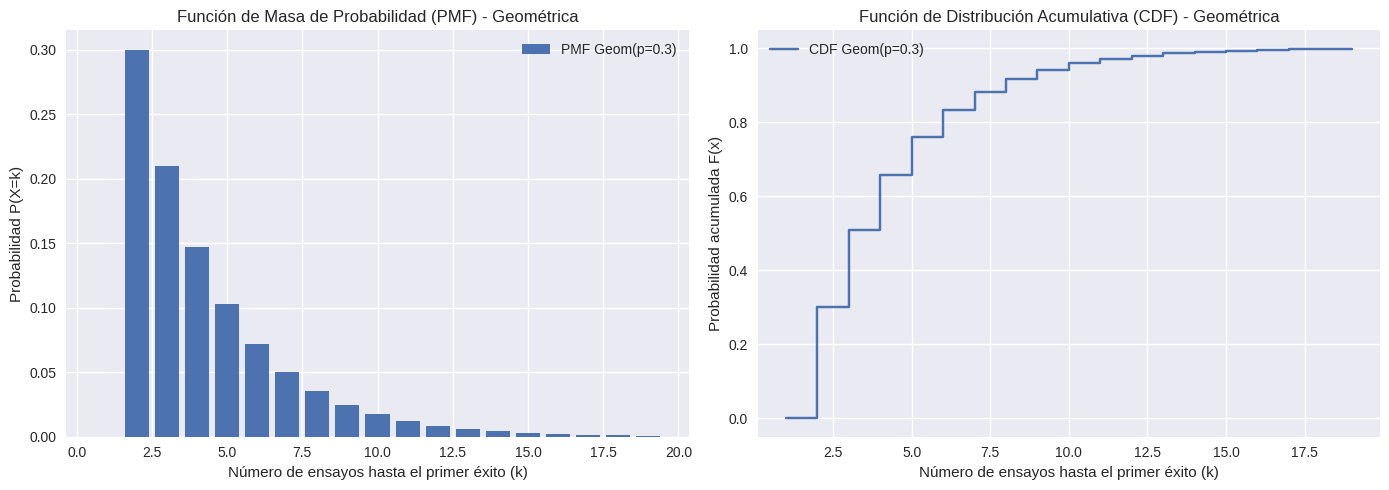

**¿Por qué la Transformada Inversa?**

1. **Relación con la exponencial**  
   Una geométrica puede verse como la "discretización" de una exponencial. Si  
   $Y \sim \text{Exponencial}(\lambda)$ con $\lambda = -\ln(1-p)$, entonces  
   $X = \lfloor Y \rfloor + 1$ sigue una geométrica con parámetro $p$.

2. **Exactitud y eficiencia**  
   - Solo requiere generar una uniforme $U \sim \text{Unif}(0,1)$  
   - Aplicación directa de fórmula cerrada:  
     $$X = \left\lfloor \frac{\ln U}{\ln(1-p)} \right\rfloor + 1$$  
   - Sin rechazos ni iteraciones (óptimo computacionalmente)

3. **Fundamento teórico**  
   La CDF geométrica $F(k) = 1 - (1-p)^k$ tiene inversa:  
   $$F^{-1}(u) = \left\lfloor \frac{\ln(1-u)}{\ln(1-p)} \right\rfloor + 1$$  
   *Simplificación*: Como $U$ y $1-U$ son igualmente distribuidas:  
   $$X = \left\lfloor \frac{\ln U}{\ln(1-p)} \right\rfloor + 1$$


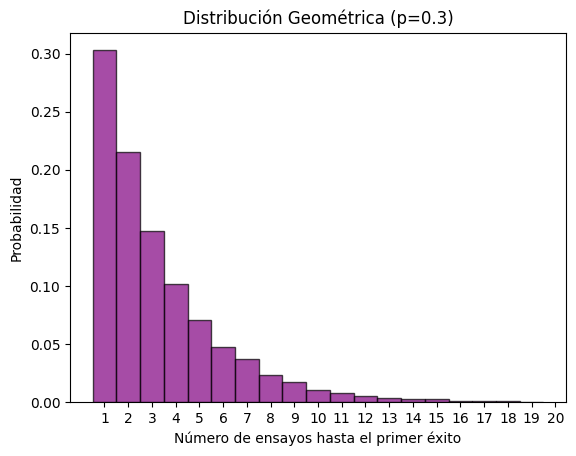

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometrica(p, size=1):
    U = np.random.uniform(0, 1, size)
    X = np.floor(np.log(U) / np.log(1 - p)).astype(int) + 1
    return X

# Ejemplo: p = 0.3 (30% de éxito por ensayo)
p = 0.3
muestras = geometrica(p, 10000)

# Visualización
plt.hist(muestras, bins=np.arange(0.5, 20.5, 1), density=True, alpha=0.7, color='purple', edgecolor='black')
plt.title(f'Distribución Geométrica (p={p})')
plt.xlabel('Número de ensayos hasta el primer éxito')
plt.ylabel('Probabilidad')
plt.xticks(np.arange(1, 21))
plt.show()

# Distribución Binomial Negativa

## Nomenclatura estándar
**Notación**:  
$X \sim \text{BN}(r, p)$

## Parámetros
- $r$: número de éxitos requeridos ($r > 0$)
- $p$: probabilidad de éxito ($0 < p \leq 1$)
- **Soporte**: $k \in \{0, 1, 2, \ldots\}$ (número de fracasos antes de $r$ éxitos)

## Función de Masa de Probabilidad (PMF)
$$
P(X = k) = \binom{k + r - 1}{r - 1} p^r (1 - p)^k
$$

## Función de Distribución Acumulada (CDF)
  $$ F(k) = I_p(r, k + 1) $$
Donde $ I_p $ es la función beta
 incompleta regularizada

## Medidas estadísticas
- **Media**: $\mu = \frac{r(1 - p)}{p}$
- **Varianza**: $\sigma^2 = \frac{r(1 - p)}{p^2}$

## Pseudocódigo para simulación
```
1. Generar k variables geométricas G_i ~ Geom(p) usando:
   G_i = floor(ln(U_i) / ln(1 - p)) + 1, donde U_i ~ Unif(0, 1).
2. Sumar las G_i para obtener X = G_1 + G_2 + ... + G_k.
3. Devolver X (número total de ensayos hasta k-ésimo éxito).
```

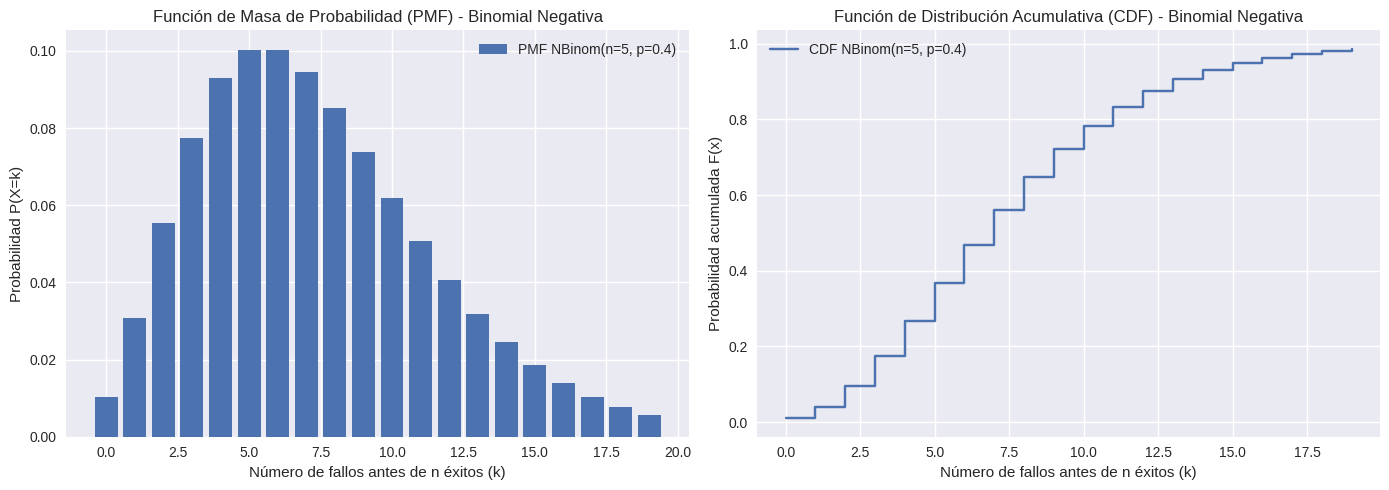

**¿Por qué el Método de Composición?**

1. **Relación con la geométrica**  
   Una binomial negativa $NB(k,p)$ es la suma de $k$ variables geométricas $Geom(p)$ i.i.d.:  
   $$X = \sum_{i=1}^k Y_i \quad \text{con } Y_i \sim Geom(p)$$  
   Esto permite reutilizar la transformada inversa de cada geométrica.

2. **Eficiencia para $k$ moderado**  
   - **Caso $k$ pequeño/medio**:  
     Computacionalmente viable (complejidad $O(k)$ por muestra).  
     ```
     def binomial_negativa(k, p, n):
         return [sum(geometrica(p) for _ in range(k)) for _ in range(n)]
     ```  
   - **Caso $k$ grande**:  
     Se aproxima por $N\left(\frac{k(1-p)}{p}, \frac{k(1-p)}{p^2}\right)$.

3. **Exactitud**  
   - Genera muestras exactas sin errores de aproximación.  
   - Superior a métodos como aceptación-rechazo que introducen variabilidad en el número de iteraciones.

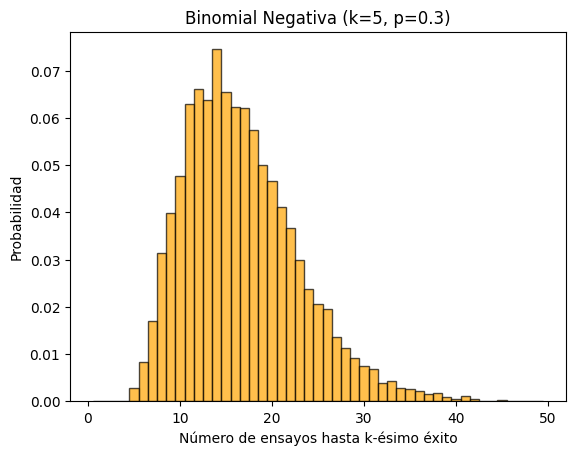

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_negativa(k, p, size=1):
    # Generar 'size' muestras de k geométricas y sumarlas
    U = np.random.uniform(0, 1, (size, k))
    G = np.floor(np.log(U) / np.log(1 - p)).astype(int) + 1
    X = np.sum(G, axis=1)
    return X

# Ejemplo: k=5 éxitos, p=0.3 de éxito por ensayo
k, p = 5, 0.3
muestras = binomial_negativa(k, p, 10000)

# Visualización
plt.hist(muestras, bins=np.arange(0.5, 50.5, 1), density=True, alpha=0.7, color='orange', edgecolor='black')
plt.title(f'Binomial Negativa (k={k}, p={p})')
plt.xlabel('Número de ensayos hasta k-ésimo éxito')
plt.ylabel('Probabilidad')
plt.show()

# Distribución Poisson

## Nomenclatura estándar
**Notación**:  
$X \sim \text{Pois}(\lambda)$

## Parámetros
- $\lambda$: parámetro de tasa ($\lambda > 0$)
- **Soporte**: $k \in \{0, 1, 2, \ldots\}$

## Función de Masa de Probabilidad (PMF)
$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

## Función de Distribución Acumulada (CDF)
$$ F(k) = e^{-\lambda} \sum_{i=0}^{\lfloor k \rfloor} \frac{\lambda^i}{i!} $$


## Medidas estadísticas
- **Media**: $\mu = \lambda$
- **Varianza**: $\sigma^2 = \lambda$
- **Moda**: $\lfloor \lambda \rfloor$

## Pseudocódigo para simulación
```
# Pseudocódigo (Algoritmo de Knuth para λ≤30)
1. Inicializar X = 0, P = 1.
2. Repetir:
     a. Generar U ~ Uniforme(0, 1).
     b. P = P * U.
     c. Si P < e^(-λ):
           Devolver X.
     d. X = X + 1.

# Pseudocódigo (Algoritmo de Ahrens-Dieter para λ>30)
1. Calcular c = 0.767 - 3.36/λ, β = π/sqrt(3λ), α = βλ, k = ln(c) - λ - ln(β).
2. Repetir:
     a. Generar U1, U2 ~ Uniforme(0, 1).
     b. Calcular X = (α - ln((1 - U1)/U1))/β.
     c. Si X > -0.5:
         Y = floor(X + 0.5), V = U2 / (1 + exp(α - βY))^2.
         Si α - βY + k >= ln(V):
             Devolver Y.


```

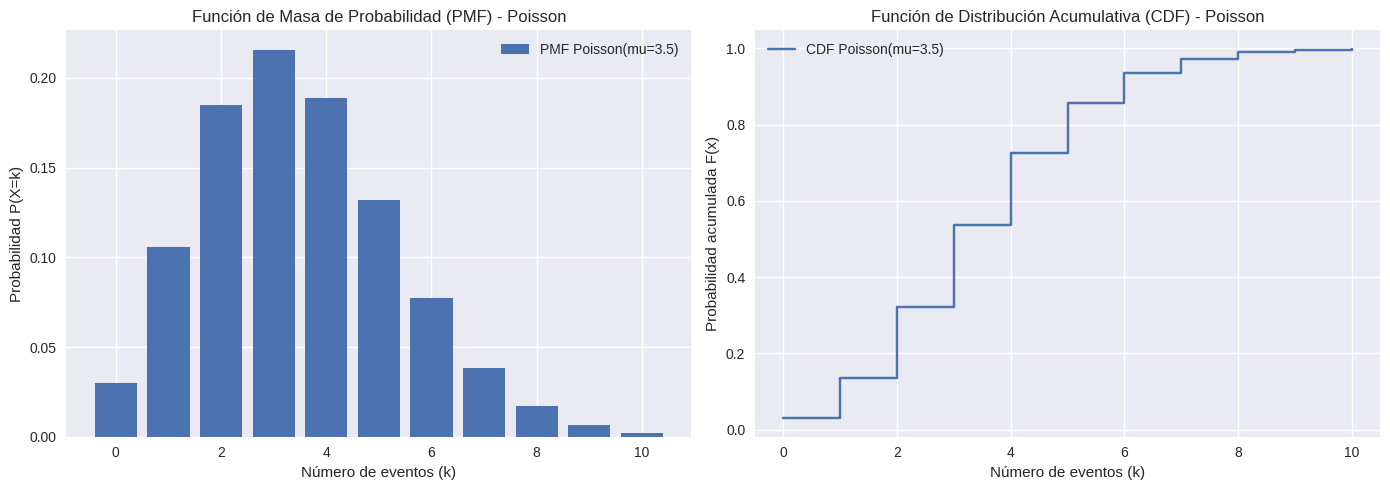

**¿Por qué Aceptación-Rechazo (Ahrens-Dieter/Knuth)?**

1. **Eficiencia para λ pequeño/moderado**  
   - *Método de Knuth* (basado en la definición de Poisson como límite de binomiales):  
     Simple pero costoso para λ > 30.  
   - *Algoritmo de Ahrens-Dieter*:  
     Optimiza el rechazo usando una envolvente exponencial.

2. **Exactitud**  
   Genera muestras exactas sin aproximaciones (a diferencia de métodos como las 12 uniformes).

3. **Flexibilidad**  
   Funciona bien para cualquier λ > 0.

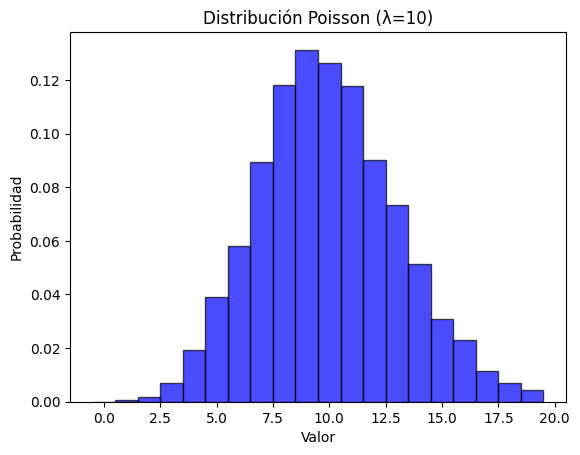

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_knuth(lambd, size=1):
    samples = []
    for _ in range(size):
        X, P = 0, 1
        while True:
            U = np.random.uniform(0, 1)
            P *= U
            if P < np.exp(-lambd):
                samples.append(X)
                break
            X += 1
    return np.array(samples)

def poisson_ahrens_dieter(lambd, size=1):
    samples = []
    c = 0.767 - 3.36 / lambd
    beta = np.pi / np.sqrt(3 * lambd)
    alpha = beta * lambd
    k = np.log(c) - lambd - np.log(beta)
    for _ in range(size):
        while True:
            U1, U2 = np.random.uniform(0, 1), np.random.uniform(0, 1)
            X = (alpha - np.log((1 - U1) / U1)) / beta
            if X > -0.5:
                Y = int(np.floor(X + 0.5))
                V = U2 / (1 + np.exp(alpha - beta * Y))**2
                if alpha - beta * Y + k >= np.log(V):
                    samples.append(Y)
                    break
    return np.array(samples)

# Ejemplo: λ = 10
lambd = 10
muestras = poisson_knuth(lambd, 10000) if lambd <= 30 else poisson_ahrens_dieter(lambd, 10000)

# Visualización
plt.hist(muestras, bins=np.arange(-0.5, 20.5, 1), density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribución Poisson (λ={lambd})')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.show()

**Teorema de la Diferencia de Variables Aleatorias Normales Independientes**  

Si $X_1$ y $X_2$ son variables aleatorias independientes con distribuciones normales:  
- $X_1 \sim N(\mu_1, \sigma_1^2)$  
- $X_2 \sim N(\mu_2, \sigma_2^2)$  

Entonces, la diferencia $D = X_2 - X_1$ también sigue una distribución normal:  
$$
D \sim N(\mu_2 - \mu_1, \, \sigma_1^2 + \sigma_2^2)
$$  

---

**Cálculo de probabilidades**  
Para calcular probabilidades, se usa la **estandarización de la normal**:  
$$
P(D < d) = P\left( Z < \frac{d - \mu_D}{\sigma_D} \right),
$$  
donde $Z \sim N(0, 1)$. Esto permite usar tablas o software de la distribución normal estándar.

---

**Teorema del Límite Central (TLC)**  

Sea $X_1, X_2, \dots, X_n$ una sucesión de variables aleatorias:  
1. **Independientes e idénticamente distribuidas (iid)** (o con ciertas condiciones de dependencia/heterogeneidad en versiones más generales).  
2. Con media $\mu$ y varianza $\sigma^2$ finitas ($\sigma^2 > 0$).  

Entonces, cuando $n \to \infty$, la **suma estandarizada** converge en distribución a una normal estándar:  
$$
\frac{S_n - n\mu}{\sigma \sqrt{n}} \xrightarrow{d} N(0,1),
$$  
donde $S_n = X_1 + X_2 + \dots + X_n$.  

---

**Implicaciones en Probabilidad**  
Para $n$ grande, las probabilidades de la **media muestral** $\bar{X}_n = \frac{S_n}{n}$ pueden aproximarse como:  
$$
P\left(\bar{X}_n \leq x\right) \approx P\left(Z \leq \frac{x - \mu}{\sigma/\sqrt{n}}\right),
$$  
con $Z \sim N(0,1)$.  

**Ejemplo**: Si $\mu = 2$, $\sigma = 1$ y $n = 30$,  
$$
P(\bar{X}_n \leq 2.1) \approx P\left(Z \leq \frac{2.1 - 2}{1/\sqrt{30}}\right) = P(Z \leq 0.55) \approx 0.7088.
$$

---

**Notas clave**:  
1. El TLC justifica el uso de la normal en intervalos de confianza y tests de hipótesis.  
2. Funciona incluso si las $X_i$ no son normales (ej. binomial, Poisson, etc.).  
3. La aproximación mejora con $n \geq 30$ (en la práctica).  

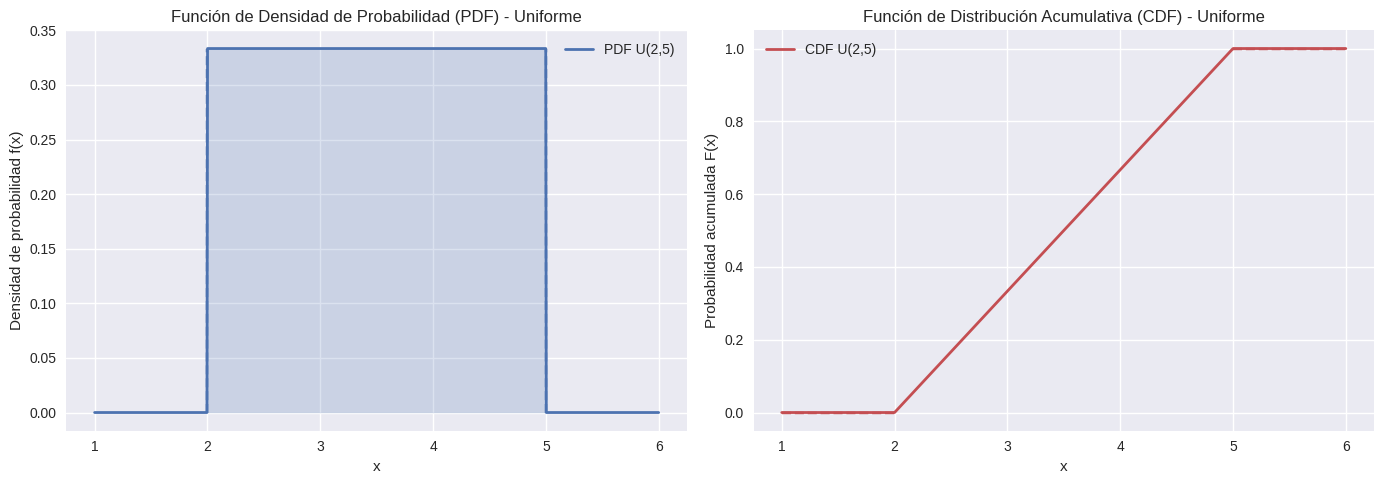

In [ ]:
# Parámetros de la distribución uniforme
a, b = 2, 5
x = np.linspace(a-1, b+1, 1000)
pdf = stats.uniform.pdf(x, loc=a, scale=b-a)
cdf = stats.uniform.cdf(x, loc=a, scale=b-a)

# Crear figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica de la función de densidad (PDF)
ax1.plot(x, pdf, 'b-', lw=2, label='PDF U(2,5)')
ax1.fill_between(x[(x>=a)&(x<=b)], pdf[(x>=a)&(x<=b)], color='b', alpha=0.2)
ax1.vlines(a, 0, pdf[(x>=a)&(x<=b)][0], colors='b', linestyles='dashed')
ax1.vlines(b, 0, pdf[(x>=a)&(x<=b)][-1], colors='b', linestyles='dashed')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad de probabilidad f(x)')
ax1.set_title('Función de Densidad de Probabilidad (PDF) - Uniforme')
ax1.legend()
ax1.grid(True)

# Gráfica de la función acumulativa (CDF)
ax2.plot(x, cdf, 'r-', lw=2, label='CDF U(2,5)')
ax2.hlines(0, x[0], a, colors='r', linestyles='dashed')
ax2.hlines(1, b, x[-1], colors='r', linestyles='dashed')
ax2.set_xlabel('x')
ax2.set_ylabel('Probabilidad acumulada F(x)')
ax2.set_title('Función de Distribución Acumulativa (CDF) - Uniforme')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()